<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

## 1    Research on F1

As I have zero knowledge on F1 prior to this assignment, I have carried out a research on F1 to get a better understanding before proceeding on for this assignment.

### 1.1 What is Formula 1 

F1 has a competition structure that involves 10 teams, with two drivers per team. It is effectively a league table format, with points racked up over the course of the season.

The world championship was founded in 1950 and is sanctioned by the FIA, which sets the rules and regulations. The sport is unique as teams build their own distinct cars every year, following the rules and regulations set by the FIA. Often they create cars with high cornering speeds. On average, F1 cars generate a top speed over 200 mph (320 kph) on the straights.

Over its 70-year history, Formula 1 has been known to be a dangerous sport, with the drivers risking their lives while racing. Over recent decades, safety has improved drastically with car modifications — such as the halo over the cockpit — to protect the drivers.

### 1.2 How does F1 qualifying work?

A qualifying session is held before each race to determine the order cars will be lined up in at the start of the race, with the fastest qualifier starting at the front and the slowest at the back.

Since 2006, qualifying takes place on Saturday afternoon in a three-stage "knockout" system. One hour is dedicated to determining the grid order, divided into three periods with short intermissions between them.

#### First Qualifying Period (Q1)
It is 18 minutes long, with all twenty cars competing. At the end of Q1, the five slowest drivers are eliminated from further qualification rounds, and fill positions sixteen to twenty on the grid based on their fastest lap time. Any driver attempting to set a qualifying time when the period ends is permitted to finish his lap, though no new laps may be started once the chequered flag is shown.

#### Second Qualifying Period (Q2)
AAFter a short break, the second period that is 15 minutes long begins, with fifteen cars on the circuit. At the end of Q2, the five slowest drivers are once again eliminated, filling grid positions eleven to fifteen.

#### Third Qualifying Period(Q3)
Finally, the third qualifying period (Q3) features the ten fastest drivers from the second period. The drivers are issued a new set of soft tyres and have twelve minutes to set a qualifying time, which will determine the top ten positions on the grid. The driver who sets the fastest qualifying time is said to be on pole position, the grid position that offers the best physical position from which to start the race.

#### Qualifying Requirements 
As of 2020, ten teams are entered for the Formula One World Championship, each entering two cars for a total of twenty cars. The regulations place a limit of twenty-six entries for the championship. At some periods in the history of Formula One the number of cars entered for each race has exceeded the number permitted, which historically would vary from race to race according to the circuit used; Monaco, for example, for many years allowed only twenty cars to compete because of the restricted space available. The slowest cars excess to the circuit limit would not qualify for the race and would be listed as 'Did Not Qualify' (DNQ) in race results.

# 2. Data Exploration

## 2.1 Importing Given Data 

In [1]:
# import the pacakges
import numpy as np
import pandas as pd

# for datetime
from datetime import datetime

# train test split
from sklearn.model_selection import train_test_split

# missing value imputation
from feature_engine.imputation import MeanMedianImputer

# for data transformation
import scipy.stats as stats
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import ReciprocalTransformer
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import MeanEncoder
from sklearn.preprocessing import LabelEncoder
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import EqualFrequencyDiscretiser
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data
data_circuits = pd.read_csv('./data/circuits_mod.csv')
data_constructor_results = pd.read_csv('./data/constructor_results_mod.csv')
data_constructor_standings = pd.read_csv('./data/constructor_standings_mod.csv')
data_constructors = pd.read_csv('./data/constructors_mod.csv')
data_driver_standings = pd.read_csv('./data/driver_standings_mod.csv')
data_drivers = pd.read_csv('./data/drivers_mod.csv')
data_lap_times = pd.read_csv('./data/lap_times_mod.csv')
data_pit_stops = pd.read_csv('./data/pit_stops_mod.csv')
data_qualifying = pd.read_csv('./data/qualifying_mod.csv')
data_races = pd.read_csv('./data/races_mod.csv')
data_results = pd.read_csv('./data/results_mod.csv')
data_seasons = pd.read_csv('./data/seasons_mod.csv')
data_status = pd.read_csv('./data/status_mod.csv')

## 2.2 Overview of Data

In [3]:
data_circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


This data shows the information of all the circuits where F1 races are held. 

In [4]:
data_constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


This data shows the race results of the constructor's championship. 

In [5]:
data_constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


This data shows the final standings of the constructor's championship.

In [6]:
data_constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


This data shows the different constructors in F1. There are a total of 211 constructors in the history of F1. 

In [7]:
data_driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10,1,1,1
1,2,18,2,8,2,2,0
2,3,18,3,6,3,3,0
3,4,18,4,5,4,4,0
4,5,18,5,4,5,5,0


This data shows the final standings of the driver's championship.

In [8]:
data_drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


This data shows the information of drivers in F1. It includes their names. date of birth, and nationality. 

In [9]:
data_lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


This data shows the Lap times in F1. 

In [10]:
data_pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


This data shows the pit stops in F1.

In [11]:
data_qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


This data shows the qualifying details in F1.

In [12]:
data_races.head()

,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


This data shows the all the races in F1. 

In [13]:
data_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1


This data shows the results of F1 races.

In [14]:
data_seasons.head()

,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...


This data shows the seasons of F1.

In [15]:
data_status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


This data shows the mapping of various statuses. 

## 2.3 Understand the data

#### Location of Grand Prix since 1950

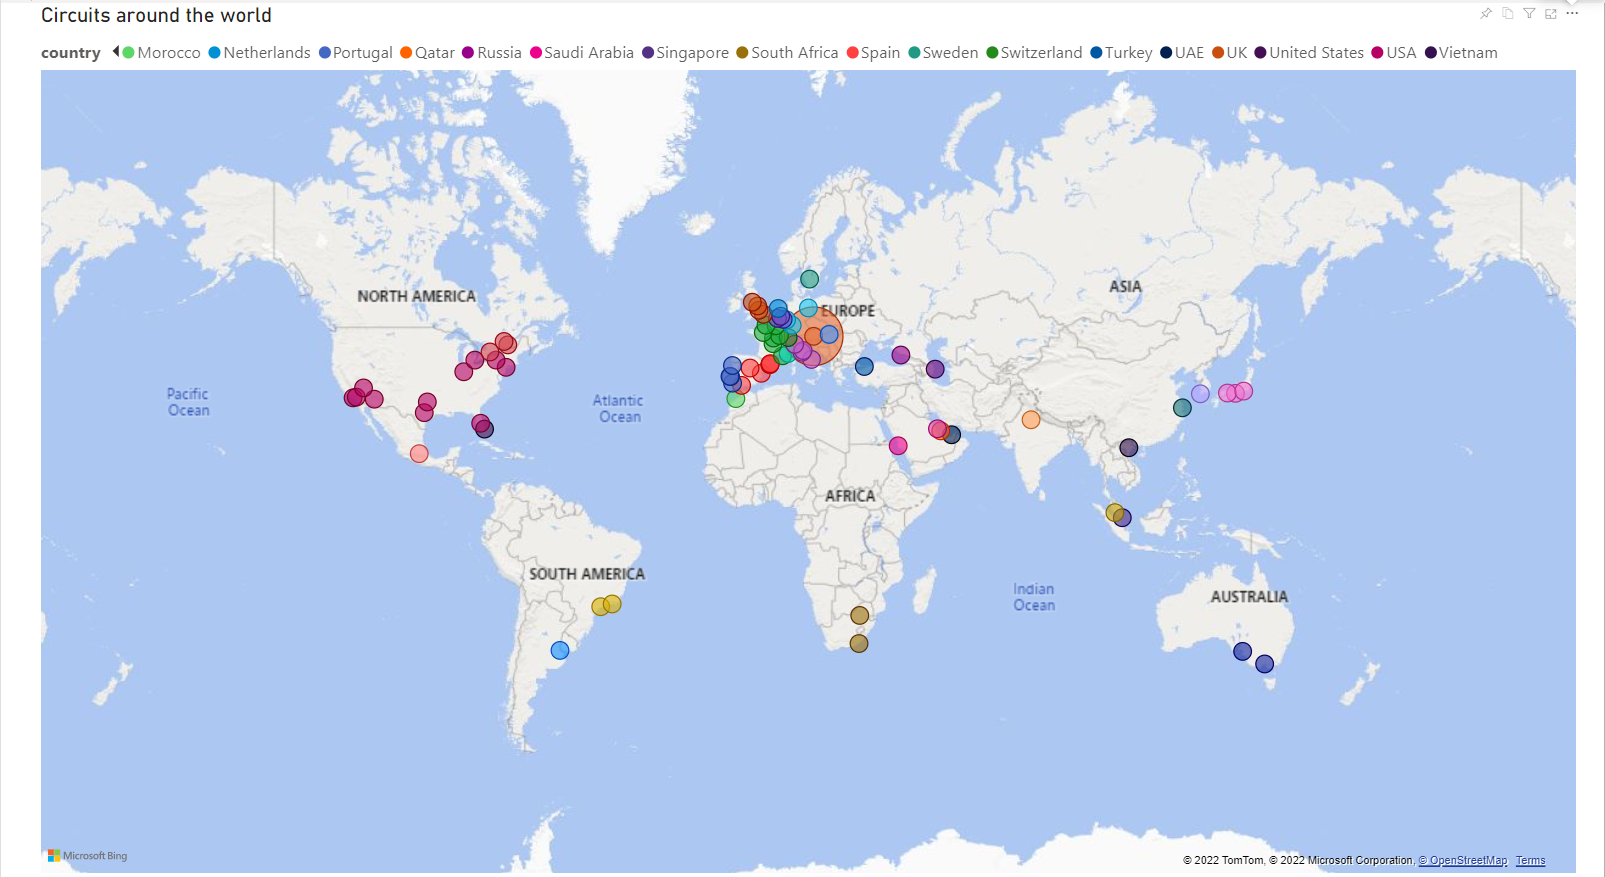

The map shows the locations of all the Grand Prix held since the inaugural season. Most of the circuits are in Europe. There are 79 circuits in total so far. 

#### Most Popular Circuits

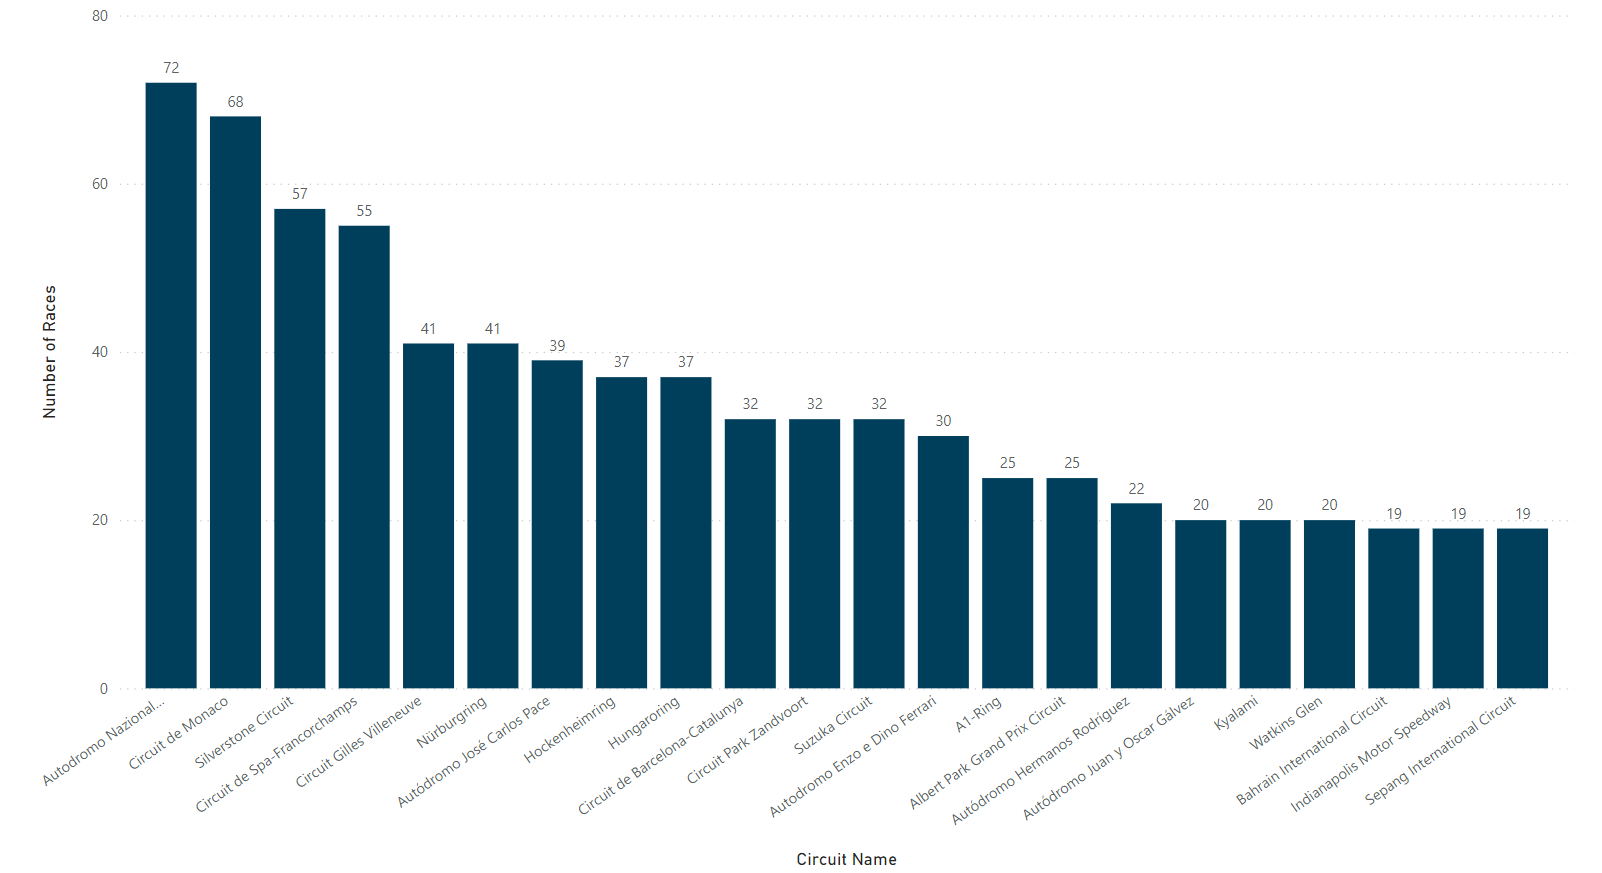

This chart shows the number of races that have occured in that circuit. The first drivers’ world championship was held in 1950 at the British Grand Prix at Silverstone and comprised only seven races. The number of Grand Prix per season varied over the years, averaging 19 races in the latest seasons. The location of the races has also varied over time, depending on the suitability of the track and other financial reasons.

#### Most Dangerous Circuits

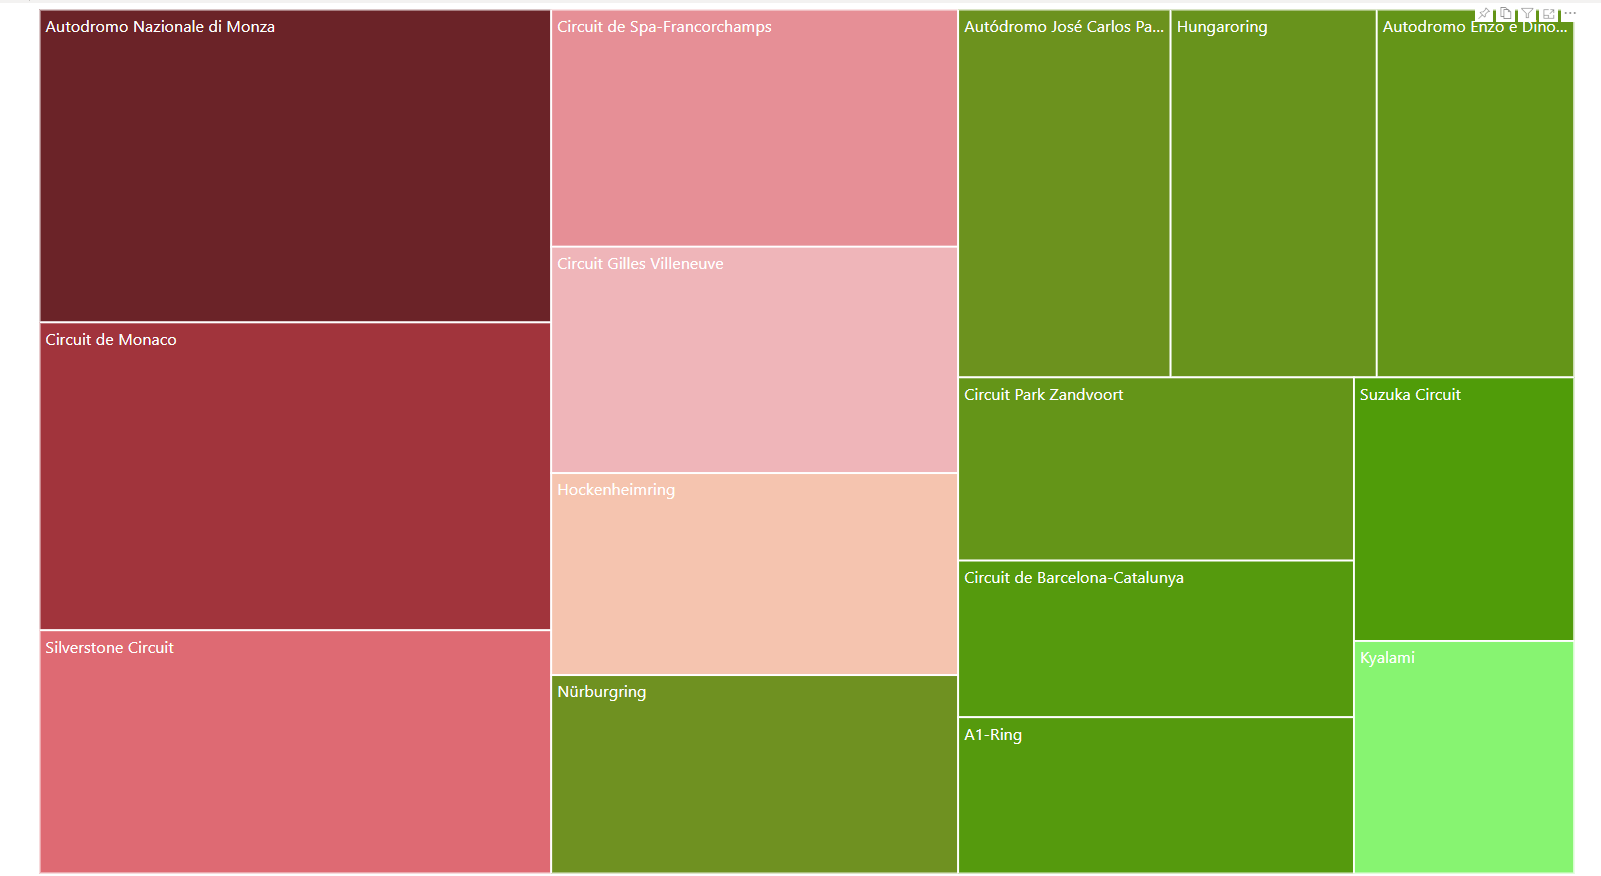

Some of the circuit layouts have been redesigned over the years to meet stricter safety requirements. Currently, most of the circuits are specifically constructed for competitions, in order to avoid long and fast straights or dangerous turns. However, some races are still held at street circuits, such as the Monaco Grand Prix, which is still in use mainly for its fame and history, despite not conforming with the latest strict measures. The following tree-map shows some of the most popular tracks by number of incidents or collisions.

#### Teams with more car failures

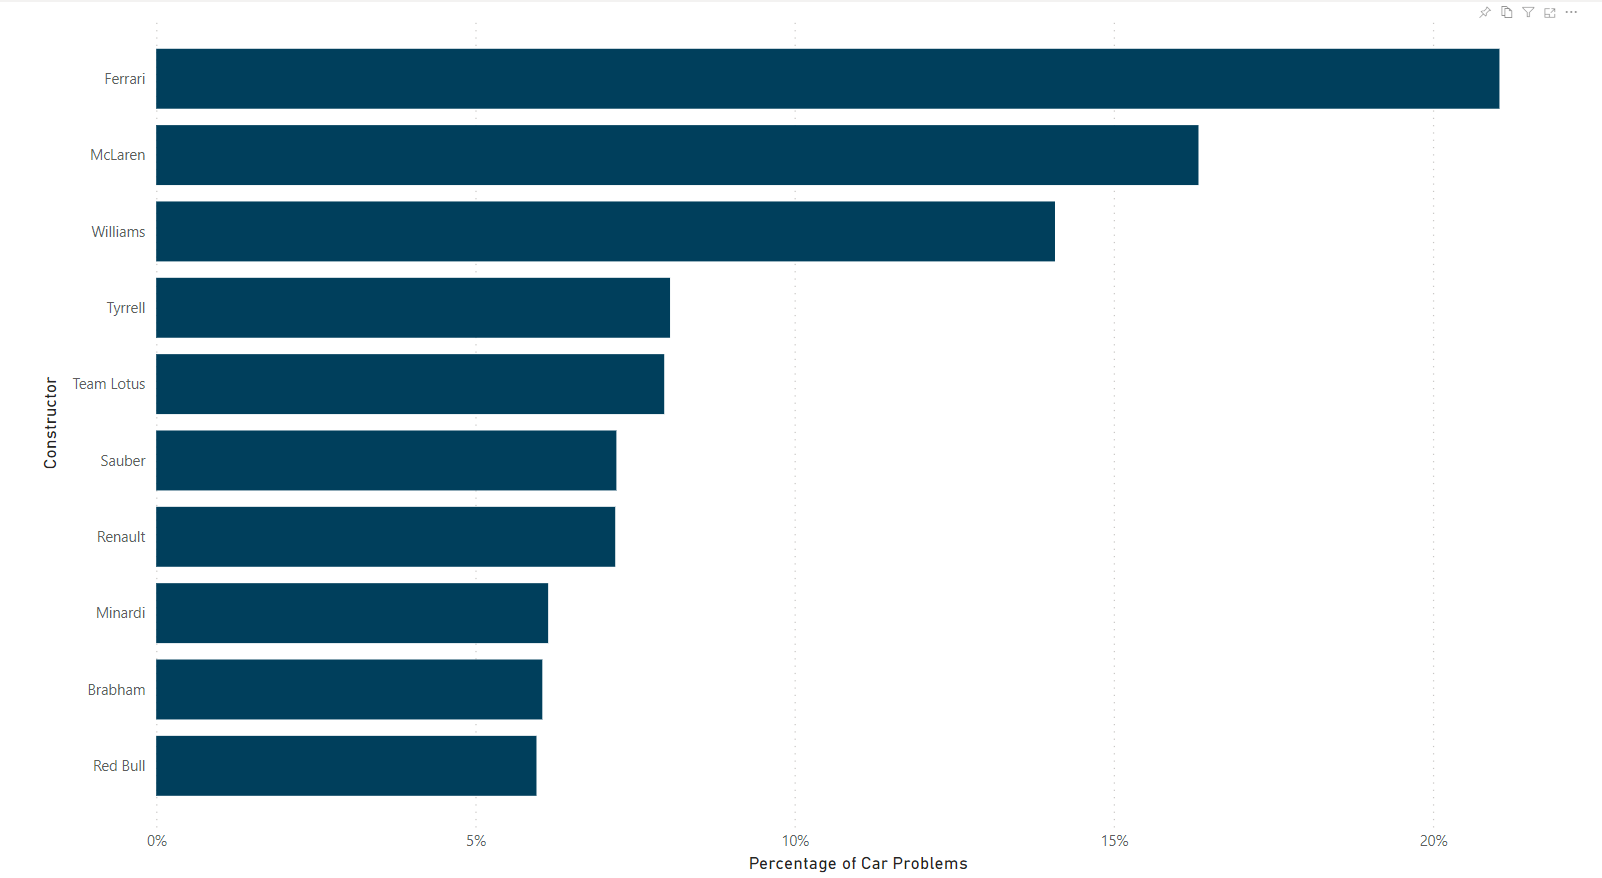

The bar chart shows which teams experienced the highest number of car problems over the years, including engine failures, brakes, suspension or transmission problems.

# 3 Classification Problem 

Predict the champion in driver standings.

# 4 Creation of DataFrame 

## 4.1 Merging Tables 

In [16]:
data_races.head()

,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [17]:
data_races.dtypes

raceId        int64
round         int64
circuitId     int64
name         object
date         object
time         object
url          object
dtype: object

While I was trying to cast the object to datetime, I got an error "ParserError: year 12009 is out of range: 4/5/12009". I believe this is a typo error.  After I fixed that typo, I soon faced a similar error "ParserError: year 12009 is out of range: 6/7/12009". Therefore, I created the code below to help me handle these errors. 

In [18]:
# split "date" into multiple columns by "/" 
data_races[['month', 'day', 'year']] = data_races['date'].str.split('/', expand=True)

In [19]:
data_races.head(10)

,raceId,round,circuitId,name,date,time,url,month,day,year
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,3,29,2009
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,4,5,12009
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,4,19,2009
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,4,26,2009
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,5,10,2009
5,6,6,6,Monaco Grand Prix,5/24/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...,5,24,2009
6,7,7,5,Turkish Grand Prix,6/7/12009,12:00:00,http://en.wikipedia.org/wiki/2009_Turkish_Gran...,6,7,12009
7,8,8,9,British Grand Prix,6/21/2009,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...,6,21,2009
8,9,9,20,German Grand Prix,7/12/2009,12:00:00,http://en.wikipedia.org/wiki/2009_German_Grand...,7,12,2009
9,10,10,11,Hungarian Grand Prix,7/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Hungarian_Gr...,7,26,2009


In [20]:
# replace value for dirty data
# if value of year in the date column is more than 4, remove first value
data_races.loc[data_races['year'].str.len() > 4, 'year'] = data_races['year'].str[1:]

In [21]:
data_races.head(10)

,raceId,round,circuitId,name,date,time,url,month,day,year
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,3,29,2009
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,4,5,2009
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,4,19,2009
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,4,26,2009
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,5,10,2009
5,6,6,6,Monaco Grand Prix,5/24/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...,5,24,2009
6,7,7,5,Turkish Grand Prix,6/7/12009,12:00:00,http://en.wikipedia.org/wiki/2009_Turkish_Gran...,6,7,2009
7,8,8,9,British Grand Prix,6/21/2009,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...,6,21,2009
8,9,9,20,German Grand Prix,7/12/2009,12:00:00,http://en.wikipedia.org/wiki/2009_German_Grand...,7,12,2009
9,10,10,11,Hungarian Grand Prix,7/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Hungarian_Gr...,7,26,2009


All years are valid now.

In [22]:
merged_df = pd.merge(data_results,data_races,on='raceId')

# drop unnessary columns 
merged_df.drop(['time_x','date','time_y','url', 'month', 'day', 'name'], axis = 1, inplace=True)

pd.set_option('display.max_columns', None)

merged_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,round,circuitId,year
0,1,18,1,1,22,1,1,1,1,10.0,58,5690616,39,2,01:27.5,218.3,1,1,1,2008
1,2,18,2,2,3,5,2,2,2,8.0,58,5696094,41,3,01:27.7,217.586,1,1,1,2008
2,3,18,3,3,7,7,3,3,3,6.0,58,5698779,41,5,01:28.1,216.719,1,1,1,2008
3,4,18,4,4,5,11,4,4,4,5.0,58,5707797,58,7,01:28.6,215.464,1,1,1,2008
4,5,18,5,1,23,3,5,5,5,4.0,58,5708630,43,1,01:27.4,218.385,1,1,1,2008


In [23]:
merged_df = pd.merge(merged_df, data_circuits,on='circuitId',how='inner')

# drop unnessary columns 
merged_df.drop(['location', 'country', 'lat', 'lng', 'alt', 'url', 'circuitRef'], axis = 1, inplace=True)

# rename column names for better understanding
merged_df.rename(columns = {'name':'circuit_name', 'year':'season'}, inplace=True)

merged_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,round,circuitId,season,circuit_name
0,1,18,1,1,22,1,1,1,1,10.0,58,5690616,39,2,01:27.5,218.3,1,1,1,2008,Albert Park Grand Prix Circuit
1,2,18,2,2,3,5,2,2,2,8.0,58,5696094,41,3,01:27.7,217.586,1,1,1,2008,Albert Park Grand Prix Circuit
2,3,18,3,3,7,7,3,3,3,6.0,58,5698779,41,5,01:28.1,216.719,1,1,1,2008,Albert Park Grand Prix Circuit
3,4,18,4,4,5,11,4,4,4,5.0,58,5707797,58,7,01:28.6,215.464,1,1,1,2008,Albert Park Grand Prix Circuit
4,5,18,5,1,23,3,5,5,5,4.0,58,5708630,43,1,01:27.4,218.385,1,1,1,2008,Albert Park Grand Prix Circuit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,25381,1072,20,117,5,17,\N,R,16,0.0,44,\N,41,16,01:34.0,236.375,130,21,77,2021,Jeddah Street Circuit
25395,25382,1072,815,9,11,5,\N,R,17,0.0,14,\N,9,17,01:34.1,236.104,4,21,77,2021,Jeddah Street Circuit
25396,25383,1072,853,210,9,20,\N,R,18,0.0,14,\N,7,20,01:37.0,229.036,4,21,77,2021,Jeddah Street Circuit
25397,25384,1072,847,3,63,14,\N,R,19,0.0,14,\N,7,19,01:36.1,231.211,4,21,77,2021,Jeddah Street Circuit


In [24]:
# REMOVE ROWS WHERE DRIVER APPEARS 6 OR LESS TIMES

# get count of each driverID
num_of_appearance = merged_df['driverId'].value_counts()

# select driverID where count is less than 7
driver_to_remove = num_of_appearance[num_of_appearance<7].index

# keep rows where the driverID column is not in driver_to_remove
merged_df = merged_df[~merged_df.driverId.isin(driver_to_remove)]

merged_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,round,circuitId,season,circuit_name
0,1,18,1,1,22,1,1,1,1,10.0,58,5690616,39,2,01:27.5,218.3,1,1,1,2008,Albert Park Grand Prix Circuit
1,2,18,2,2,3,5,2,2,2,8.0,58,5696094,41,3,01:27.7,217.586,1,1,1,2008,Albert Park Grand Prix Circuit
2,3,18,3,3,7,7,3,3,3,6.0,58,5698779,41,5,01:28.1,216.719,1,1,1,2008,Albert Park Grand Prix Circuit
3,4,18,4,4,5,11,4,4,4,5.0,58,5707797,58,7,01:28.6,215.464,1,1,1,2008,Albert Park Grand Prix Circuit
4,5,18,5,1,23,3,5,5,5,4.0,58,5708630,43,1,01:27.4,218.385,1,1,1,2008,Albert Park Grand Prix Circuit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,25381,1072,20,117,5,17,\N,R,16,0.0,44,\N,41,16,01:34.0,236.375,130,21,77,2021,Jeddah Street Circuit
25395,25382,1072,815,9,11,5,\N,R,17,0.0,14,\N,9,17,01:34.1,236.104,4,21,77,2021,Jeddah Street Circuit
25396,25383,1072,853,210,9,20,\N,R,18,0.0,14,\N,7,20,01:37.0,229.036,4,21,77,2021,Jeddah Street Circuit
25397,25384,1072,847,3,63,14,\N,R,19,0.0,14,\N,7,19,01:36.1,231.211,4,21,77,2021,Jeddah Street Circuit


In [25]:
# REMOVE ROWS WHERE CONSTRUCTOR APPEARS 10 OR LESS TIMES

# get count of each constructorID
num_of_appearance2 = merged_df['constructorId'].value_counts()

# select driverID where count is less than 11
constructor_to_remove = num_of_appearance2[num_of_appearance2<11].index

# keep rows where the driverID column is not in driver_to_remove
merged_df = merged_df[~merged_df.constructorId.isin(constructor_to_remove)]

merged_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,round,circuitId,season,circuit_name
0,1,18,1,1,22,1,1,1,1,10.0,58,5690616,39,2,01:27.5,218.3,1,1,1,2008,Albert Park Grand Prix Circuit
1,2,18,2,2,3,5,2,2,2,8.0,58,5696094,41,3,01:27.7,217.586,1,1,1,2008,Albert Park Grand Prix Circuit
2,3,18,3,3,7,7,3,3,3,6.0,58,5698779,41,5,01:28.1,216.719,1,1,1,2008,Albert Park Grand Prix Circuit
3,4,18,4,4,5,11,4,4,4,5.0,58,5707797,58,7,01:28.6,215.464,1,1,1,2008,Albert Park Grand Prix Circuit
4,5,18,5,1,23,3,5,5,5,4.0,58,5708630,43,1,01:27.4,218.385,1,1,1,2008,Albert Park Grand Prix Circuit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,25381,1072,20,117,5,17,\N,R,16,0.0,44,\N,41,16,01:34.0,236.375,130,21,77,2021,Jeddah Street Circuit
25395,25382,1072,815,9,11,5,\N,R,17,0.0,14,\N,9,17,01:34.1,236.104,4,21,77,2021,Jeddah Street Circuit
25396,25383,1072,853,210,9,20,\N,R,18,0.0,14,\N,7,20,01:37.0,229.036,4,21,77,2021,Jeddah Street Circuit
25397,25384,1072,847,3,63,14,\N,R,19,0.0,14,\N,7,19,01:36.1,231.211,4,21,77,2021,Jeddah Street Circuit


Some of the drivers or constructors were only present for very few races. Consequently, if they were kept, when dividing the data into train and test, there are some record of such drivers or constructors that cannot be found in a certain dataset. Those drivers or constructors were removed if there were less than 6 and 10 respectively.

In [26]:
merged_df = pd.merge(merged_df, data_drivers,on='driverId',how='inner')

# drop unnessary columns 
merged_df.drop(['driverRef', 'number_y', 'code', 'nationality', 'url'], axis = 1, inplace=True)

# Driver Name 
merged_df['driver_name'] = merged_df['forename']+' '+merged_df['surname']
merged_df.drop(['forename','surname'], axis = 1, inplace=True)

merged_df.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,round,circuitId,season,circuit_name,dob,driver_name
0,1,18,1,1,22,1,1,1,1,10.0,58,5690616,39,2,01:27.5,218.3,1,1,1,2008,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton
1,371,36,1,1,2,4,3,3,3,6.0,58,5147365,20,3,01:26.4,221.083,1,1,1,2007,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton
2,7573,1,1,1,1,18,\N,D,20,0.0,58,\N,39,13,01:29.0,214.455,2,1,1,2009,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton
3,20352,338,1,1,2,11,6,6,6,8.0,58,5646429,47,3,01:28.5,215.7,1,2,1,2010,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton
4,20780,841,1,1,3,2,2,2,2,18.0,58,5392556,41,8,01:30.3,211.382,1,1,1,2011,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton


In [27]:
merged_df = pd.merge(merged_df,data_driver_standings,on=['raceId','driverId'],how='inner').drop('driverStandingsId', axis=1)

# drop unnessary columns 
merged_df.drop(['position_x','positionText_x', 'fastestLapTime', 'points_y', 'positionText_y'], axis = 1, inplace=True)

# rename column names for better understanding
merged_df.rename(columns = {'number_x':'number', 'points_x':'points', 'position_y':'d_position', 'wins':'d_wins'}, inplace=True)

merged_df.head()

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,statusId,round,circuitId,season,circuit_name,dob,driver_name,d_position,d_wins
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.3,1,1,1,2008,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton,1,1
1,371,36,1,1,2,4,3,6.0,58,5147365,20,3,221.083,1,1,1,2007,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton,3,0
2,20352,338,1,1,2,11,6,8.0,58,5646429,47,3,215.7,1,2,1,2010,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton,4,0
3,20780,841,1,1,3,2,2,18.0,58,5392556,41,8,211.382,1,1,1,2011,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton,2,0
4,21234,860,1,1,4,1,3,15.0,58,5653640,57,4,213.214,1,1,1,2012,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton,3,0


In [28]:
merged_df = pd.merge(merged_df, data_constructors,on='constructorId',how='inner').drop(['constructorRef','nationality','url'], axis=1)

# rename column names for better understanding
merged_df.rename(columns = {'name':'company'}, inplace=True)

merged_df.head()

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,statusId,round,circuitId,season,circuit_name,dob,driver_name,d_position,d_wins,company
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.3,1,1,1,2008,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton,1,1,McLaren
1,371,36,1,1,2,4,3,6.0,58,5147365,20,3,221.083,1,1,1,2007,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton,3,0,McLaren
2,20352,338,1,1,2,11,6,8.0,58,5646429,47,3,215.7,1,2,1,2010,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton,4,0,McLaren
3,20780,841,1,1,3,2,2,18.0,58,5392556,41,8,211.382,1,1,1,2011,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton,2,0,McLaren
4,21234,860,1,1,4,1,3,15.0,58,5653640,57,4,213.214,1,1,1,2012,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton,3,0,McLaren


In [29]:
merged_df = pd.merge(merged_df, data_status,on='statusId',how='inner')

merged_df.head()

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,statusId,round,circuitId,season,circuit_name,dob,driver_name,d_position,d_wins,company,status
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.3,1,1,1,2008,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton,1,1,McLaren,Finished
1,371,36,1,1,2,4,3,6.0,58,5147365,20,3,221.083,1,1,1,2007,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton,3,0,McLaren,Finished
2,20352,338,1,1,2,11,6,8.0,58,5646429,47,3,215.7,1,2,1,2010,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton,4,0,McLaren,Finished
3,20780,841,1,1,3,2,2,18.0,58,5392556,41,8,211.382,1,1,1,2011,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton,2,0,McLaren,Finished
4,21234,860,1,1,4,1,3,15.0,58,5653640,57,4,213.214,1,1,1,2012,Albert Park Grand Prix Circuit,1985-01-07,Lewis Hamilton,3,0,McLaren,Finished


## 4.2 Create New Features

In [30]:
merged_df.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
positionOrder        int64
points             float64
laps                 int64
milliseconds        object
fastestLap          object
rank                object
fastestLapSpeed     object
statusId             int64
round                int64
circuitId            int64
season              object
circuit_name        object
dob                 object
driver_name         object
d_position           int64
d_wins               int64
company             object
status              object
dtype: object

In [31]:
# converting to 'dob' to date format 
 
merged_df['dob'] = pd.to_datetime(merged_df['dob'])

# calculating driver's age and creating it as a new column
dates = datetime.today()-merged_df['dob']
age = dates.dt.days/365

merged_df['d_age'] = round(age)

# drop dob 
merged_df.drop(['dob'], axis = 1, inplace=True)

merged_df.head()

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,statusId,round,circuitId,season,circuit_name,driver_name,d_position,d_wins,company,status,d_age
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.3,1,1,1,2008,Albert Park Grand Prix Circuit,Lewis Hamilton,1,1,McLaren,Finished,38.0
1,371,36,1,1,2,4,3,6.0,58,5147365,20,3,221.083,1,1,1,2007,Albert Park Grand Prix Circuit,Lewis Hamilton,3,0,McLaren,Finished,38.0
2,20352,338,1,1,2,11,6,8.0,58,5646429,47,3,215.7,1,2,1,2010,Albert Park Grand Prix Circuit,Lewis Hamilton,4,0,McLaren,Finished,38.0
3,20780,841,1,1,3,2,2,18.0,58,5392556,41,8,211.382,1,1,1,2011,Albert Park Grand Prix Circuit,Lewis Hamilton,2,0,McLaren,Finished,38.0
4,21234,860,1,1,4,1,3,15.0,58,5653640,57,4,213.214,1,1,1,2012,Albert Park Grand Prix Circuit,Lewis Hamilton,3,0,McLaren,Finished,38.0


## 4.3 Changing Data Type

In [32]:
# changing datatype

change = ['number','milliseconds','fastestLap','rank','fastestLapSpeed']
for i in change:
    merged_df[i] = pd.to_numeric(merged_df[i],errors='coerce')

In [33]:
merged_df.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number             float64
grid                 int64
positionOrder        int64
points             float64
laps                 int64
milliseconds       float64
fastestLap         float64
rank               float64
fastestLapSpeed    float64
statusId             int64
round                int64
circuitId            int64
season              object
circuit_name        object
driver_name         object
d_position           int64
d_wins               int64
company             object
status              object
d_age              float64
dtype: object

In [34]:
merged_df.head()

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,statusId,round,circuitId,season,circuit_name,driver_name,d_position,d_wins,company,status,d_age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,1,1,2008,Albert Park Grand Prix Circuit,Lewis Hamilton,1,1,McLaren,Finished,38.0
1,371,36,1,1,2.0,4,3,6.0,58,5147365.0,20.0,3.0,221.083,1,1,1,2007,Albert Park Grand Prix Circuit,Lewis Hamilton,3,0,McLaren,Finished,38.0
2,20352,338,1,1,2.0,11,6,8.0,58,5646429.0,47.0,3.0,215.700,1,2,1,2010,Albert Park Grand Prix Circuit,Lewis Hamilton,4,0,McLaren,Finished,38.0
3,20780,841,1,1,3.0,2,2,18.0,58,5392556.0,41.0,8.0,211.382,1,1,1,2011,Albert Park Grand Prix Circuit,Lewis Hamilton,2,0,McLaren,Finished,38.0
4,21234,860,1,1,4.0,1,3,15.0,58,5653640.0,57.0,4.0,213.214,1,1,1,2012,Albert Park Grand Prix Circuit,Lewis Hamilton,3,0,McLaren,Finished,38.0


## 4.4 Data Filtration

In [35]:
final_df = merged_df[merged_df['status'] == 'Finished']
final_df.head()

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,statusId,round,circuitId,season,circuit_name,driver_name,d_position,d_wins,company,status,d_age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,1,1,2008,Albert Park Grand Prix Circuit,Lewis Hamilton,1,1,McLaren,Finished,38.0
1,371,36,1,1,2.0,4,3,6.0,58,5147365.0,20.0,3.0,221.083,1,1,1,2007,Albert Park Grand Prix Circuit,Lewis Hamilton,3,0,McLaren,Finished,38.0
2,20352,338,1,1,2.0,11,6,8.0,58,5646429.0,47.0,3.0,215.700,1,2,1,2010,Albert Park Grand Prix Circuit,Lewis Hamilton,4,0,McLaren,Finished,38.0
3,20780,841,1,1,3.0,2,2,18.0,58,5392556.0,41.0,8.0,211.382,1,1,1,2011,Albert Park Grand Prix Circuit,Lewis Hamilton,2,0,McLaren,Finished,38.0
4,21234,860,1,1,4.0,1,3,15.0,58,5653640.0,57.0,4.0,213.214,1,1,1,2012,Albert Park Grand Prix Circuit,Lewis Hamilton,3,0,McLaren,Finished,38.0


In [36]:
# missing value imputation for season

final_df = final_df.sort_values(by=['raceId'], ascending=True)
final_df['season']=final_df['season'].fillna(method='ffill')
final_df.season.astype('int32')

final_df.isnull().mean().sort_values(ascending=True)


resultId           0.000000
company            0.000000
d_wins             0.000000
d_position         0.000000
driver_name        0.000000
circuit_name       0.000000
season             0.000000
circuitId          0.000000
round              0.000000
statusId           0.000000
status             0.000000
d_age              0.000000
laps               0.000000
points             0.000000
positionOrder      0.000000
grid               0.000000
number             0.000000
constructorId      0.000000
driverId           0.000000
raceId             0.000000
milliseconds       0.000298
rank               0.490611
fastestLapSpeed    0.493741
fastestLap         0.493741
dtype: float64

Some of the dates of the races were not given in the dataset. Therefore, I sorted the data based on raceId and used a forward filling method to fill the null values in 'year'. 

In [37]:
# only keep events that happen in recent 10 years

final_df['season'] = final_df['season'].astype('datetime64[ns]')
final_df['season'] = final_df['season'].dt.year

final_df = final_df[final_df['season']>2012]

In [38]:
#only keep rows where the fastestLapSpeed is more than the mean of all driver's fastestLapSpeed

mean = final_df.fastestLapSpeed.mean()
final_df = final_df[final_df['fastestLapSpeed']>mean]
final_df.head()

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,statusId,round,circuitId,season,circuit_name,driver_name,d_position,d_wins,company,status,d_age
491,21722,880,815,1,6.0,15,11,0.0,58,5486592.0,46.0,6.0,212.294,1,1,1,2013,Albert Park Grand Prix Circuit,Sergio Pérez,11,0,McLaren,Finished,33.0
880,21716,880,1,131,10.0,3,5,10.0,58,5448786.0,45.0,5.0,212.689,1,1,1,2013,Albert Park Grand Prix Circuit,Lewis Hamilton,5,0,Mercedes,Finished,38.0
3926,21712,880,8,208,7.0,7,1,25.0,58,5403225.0,56.0,1.0,213.845,1,1,1,2013,Albert Park Grand Prix Circuit,Kimi Räikkönen,1,1,Lotus F1,Finished,43.0
3970,21721,880,154,208,8.0,8,10,1.0,58,5485984.0,41.0,9.0,211.193,1,1,1,2013,Albert Park Grand Prix Circuit,Romain Grosjean,10,0,Lotus F1,Finished,36.0
2890,21715,880,13,6,4.0,4,4,12.0,58,5436802.0,38.0,8.0,211.558,1,1,1,2013,Albert Park Grand Prix Circuit,Felipe Massa,4,0,Ferrari,Finished,41.0


The winner of the race is usually the one with a faster lap speed therefore the fastestLapSpeed is a factor that I think is important to predict the winner of the race. I only kept the rows where the driver's fastestLapSpeed is more than the mean of all driver's fastestLapSpeed. This would make my dataset to have those drivers who are really top notch and have the chance of winning the championship.

In [39]:
#drop unwanted columns

final_df.drop(['statusId', 'circuitId', 'constructorId', 'resultId',], axis = 1, inplace= True)

In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 491 to 1254
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           890 non-null    int64  
 1   driverId         890 non-null    int64  
 2   number           890 non-null    float64
 3   grid             890 non-null    int64  
 4   positionOrder    890 non-null    int64  
 5   points           890 non-null    float64
 6   laps             890 non-null    int64  
 7   milliseconds     890 non-null    float64
 8   fastestLap       890 non-null    float64
 9   rank             890 non-null    float64
 10  fastestLapSpeed  890 non-null    float64
 11  round            890 non-null    int64  
 12  season           890 non-null    int64  
 13  circuit_name     890 non-null    object 
 14  driver_name      890 non-null    object 
 15  d_position       890 non-null    int64  
 16  d_wins           890 non-null    int64  
 17  company      

.info() shows a concise summary of the Data Frame. We can tell that some of the columns contain null values. We can also see the data type of each column.

In [41]:
final_df.dtypes

raceId               int64
driverId             int64
number             float64
grid                 int64
positionOrder        int64
points             float64
laps                 int64
milliseconds       float64
fastestLap         float64
rank               float64
fastestLapSpeed    float64
round                int64
season               int64
circuit_name        object
driver_name         object
d_position           int64
d_wins               int64
company             object
status              object
d_age              float64
dtype: object

.dtypes() shows solely the data type of each variable, based on this, let's find the categorical and numerical variables.

In [42]:
final_df.describe()

,raceId,driverId,number,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,round,season,d_position,d_wins,d_age
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,8.900000e+02,890.000000,890.000000,890.000000,890.000000,890.000000,890.00000,890.000000,890.000000
mean,993.086517,525.068539,25.883146,7.408989,8.664045,10.177528,57.153933,5.578858e+06,48.632584,6.697753,222.793549,10.643820,2017.753933,7.17191,1.014607,32.797753
std,54.887556,392.800276,23.539781,5.348709,15.809700,7.866286,9.098382,9.020259e+05,11.801453,4.534048,11.582815,5.358266,2.580778,5.07721,2.079632,5.812364
min,880.000000,1.000000,1.000000,0.000000,1.000000,0.000000,43.000000,4.526665e+06,11.000000,1.000000,206.270000,1.000000,2013.000000,1.00000,0.000000,22.000000
25%,957.000000,16.000000,7.000000,3.000000,3.000000,4.000000,52.000000,5.112058e+06,41.000000,3.000000,213.161250,7.000000,2016.000000,3.00000,0.000000,27.250000
50%,1002.000000,817.000000,18.000000,6.000000,5.500000,10.000000,53.000000,5.405067e+06,50.000000,6.000000,221.000000,11.000000,2018.000000,6.00000,0.000000,33.000000
75%,1038.000000,830.000000,34.500000,11.000000,9.000000,15.000000,63.750000,5.605798e+06,57.000000,10.000000,231.775750,14.750000,2020.000000,11.00000,1.000000,37.000000
max,1073.000000,854.000000,99.000000,22.000000,99.000000,27.000000,87.000000,1.081032e+07,85.000000,22.000000,255.014000,22.000000,2021.000000,22.00000,11.000000,46.000000


.describe() shows the statistics of each numerical variable, e.g., the 25th, 50th and 75th quantiles, the mean, standard deviation and minimum and maximum value. Comparing these parameters we can quickly understand whether our features are in a similar scale. In this case, they are not. 

In [43]:
# seperating categorical and numerical columns for understading 

cat = []
num = []
for i in final_df.columns:
    if final_df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [44]:
final_df[cat].head()

,circuit_name,driver_name,company,status
491,Albert Park Grand Prix Circuit,Sergio Pérez,McLaren,Finished
880,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,Finished
3926,Albert Park Grand Prix Circuit,Kimi Räikkönen,Lotus F1,Finished
3970,Albert Park Grand Prix Circuit,Romain Grosjean,Lotus F1,Finished
2890,Albert Park Grand Prix Circuit,Felipe Massa,Ferrari,Finished


In [45]:
final_df[num].head()

,raceId,driverId,number,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,round,season,d_position,d_wins,d_age
491,880,815,6.0,15,11,0.0,58,5486592.0,46.0,6.0,212.294,1,2013,11,0,33.0
880,880,1,10.0,3,5,10.0,58,5448786.0,45.0,5.0,212.689,1,2013,5,0,38.0
3926,880,8,7.0,7,1,25.0,58,5403225.0,56.0,1.0,213.845,1,2013,1,1,43.0
3970,880,154,8.0,8,10,1.0,58,5485984.0,41.0,9.0,211.193,1,2013,10,0,36.0
2890,880,13,4.0,4,4,12.0,58,5436802.0,38.0,8.0,211.558,1,2013,4,0,41.0


# 5 Data Cleansing and Transformation

## 5.1 Check for Outliers

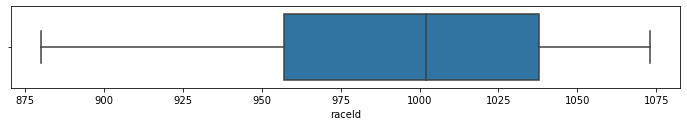

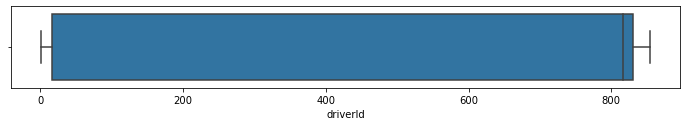

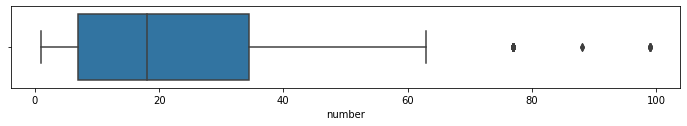

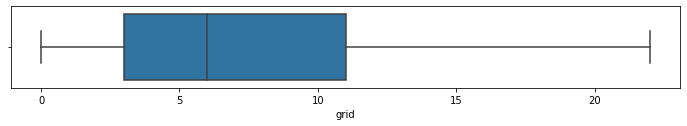

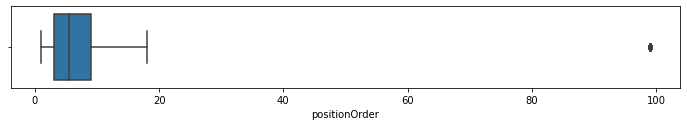

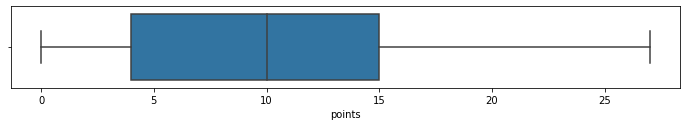

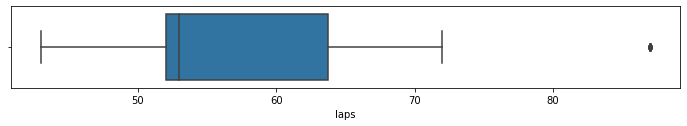

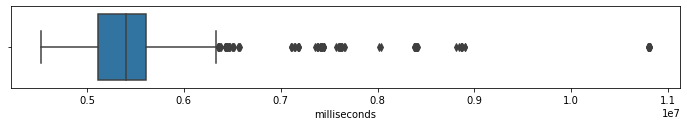

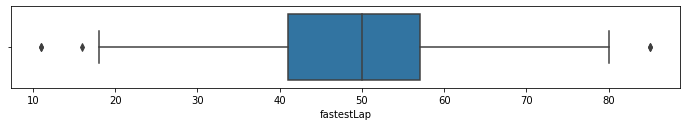

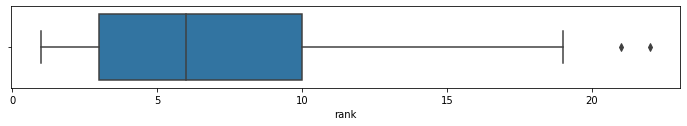

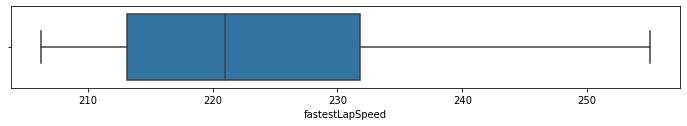

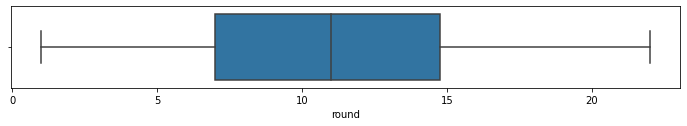

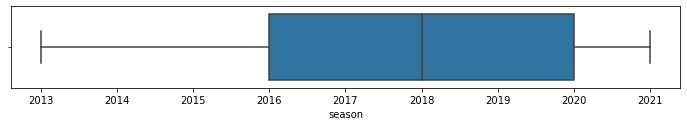

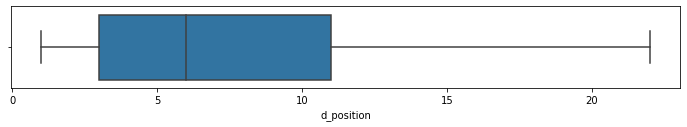

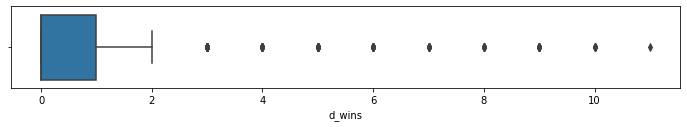

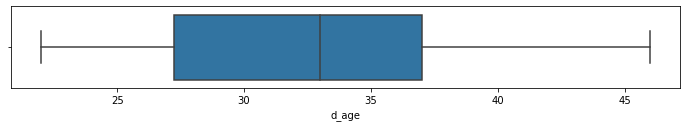

In [46]:
for column in num:
    plt.figure(figsize=(12, 1.5))
    sns.boxplot(final_df[column])

In [47]:
final_df.skew()

raceId            -0.507091
driverId          -0.524528
number             1.203418
grid               0.750420
positionOrder      5.234892
points             0.428129
laps               0.784743
milliseconds       2.975452
fastestLap        -0.181576
rank               0.637192
fastestLapSpeed    0.530641
round             -0.088799
season            -0.467822
d_position         0.752197
d_wins             2.517293
d_age              0.048721
dtype: float64

 - -1 -> left skewed
 - 0 -> normal distribution
 - 1 -> right skewed 

## 5.2 Distribution of Numerical Variables

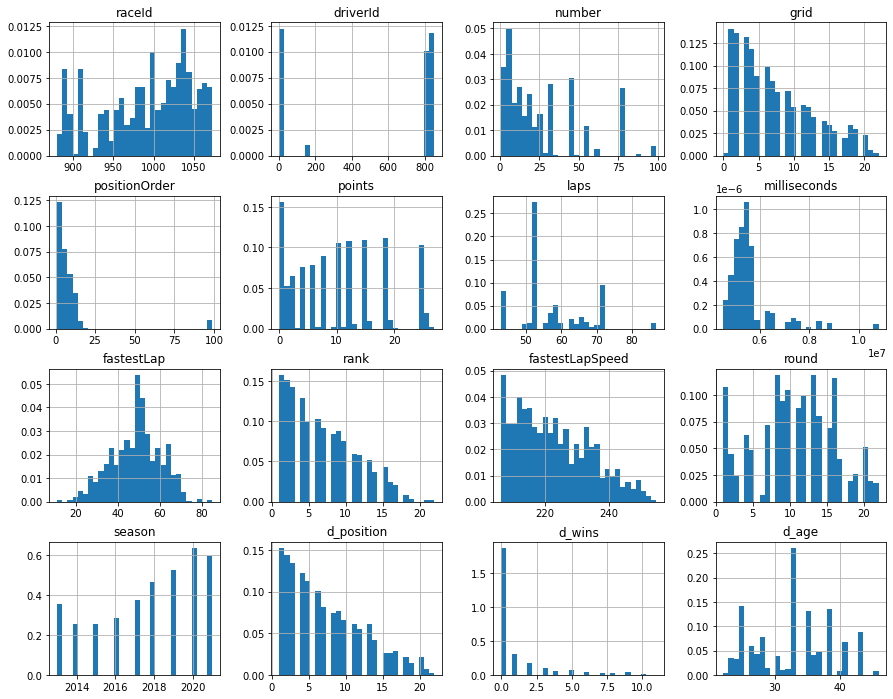

In [48]:
final_df.hist(bins=30, figsize=(15,12), density=True)
plt.show()

I am not happy with the distributions of these variables. I am likely to use proper transformation methods to transform 'miliseconds' and 'fastestLapSpeed' after the Train Test Split and Missing Data Imputation process.

## 5.3 Train and Test Split

In [49]:
x = final_df.drop(['driverId', 'driver_name'], axis = 1)
y = final_df.driverId

In [50]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((623, 18), (267, 18))

## 5.4 Missing Data

### Number, Rank, FastestLap

In [51]:
# Used the .fillna(0) method to fill the null values 

X_train['number'] = X_train['number'].fillna(0)
X_train['rank'] = X_train['rank'].fillna(0)
X_train['fastestLap'] = X_train['fastestLap'].fillna(0)

# apply to X_test as well 
X_test['number'] = X_test['number'].fillna(0)
X_test['rank'] = X_test['rank'].fillna(0)
X_test['fastestLap'] = X_test['fastestLap'].fillna(0)

### FastestLapSpeed

In [52]:
# create a mean imputer 

imputer = MeanMedianImputer(imputation_method='mean',
                                   variables=['fastestLapSpeed'])

imputer.fit(X_train)

MeanMedianImputer(imputation_method='mean', variables=['fastestLapSpeed'])

In [53]:
#Inspect the value
imputer.imputer_dict_

{'fastestLapSpeed': 222.68633226324218}

In [54]:
X_train = imputer.transform(X_train)

# apply to X_train as well
X_test = imputer.transform(X_test)

### Milliseconds

In [55]:
# create a mean imputer 

imputer2 = MeanMedianImputer(imputation_method='mean',
                                   variables=['milliseconds'])

imputer2.fit(X_train)

MeanMedianImputer(imputation_method='mean', variables=['milliseconds'])

In [56]:
#Inspect the value
imputer2.imputer_dict_

{'milliseconds': 5550654.730337079}

In [57]:
X_train = imputer2.transform(X_train)

# apply to X_train as well
X_test = imputer2.transform(X_test)

In [58]:
# Check if the missing values are replaced

X_train.isnull().sum()

raceId             0
number             0
grid               0
positionOrder      0
points             0
laps               0
milliseconds       0
fastestLap         0
rank               0
fastestLapSpeed    0
round              0
season             0
circuit_name       0
d_position         0
d_wins             0
company            0
status             0
d_age              0
dtype: int64

## 5.5 Numerical Data Transformation

I will transform 'miliseconds' and 'fastestLapSpeed' here.

### Preparing for Numerical Transformation

In [59]:
# create a copy of the dataframe 

X_train2 = X_train.copy(deep=True)
variables_toTransform = ['milliseconds', 'fastestLapSpeed']
X_train2.head()

,raceId,number,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,round,season,circuit_name,d_position,d_wins,company,status,d_age
1536,895,12.0,14,7,6.0,53,5280931.0,50.0,12.0,216.636,15,2013,Suzuka Circuit,16,0,Sauber,Finished,31.0
1274,1042,77.0,2,2,18.0,66,5422420.0,66.0,2.0,211.113,12,2020,Autódromo Internacional do Algarve,2,2,Mercedes,Finished,33.0
496,892,6.0,8,12,0.0,53,4753117.0,44.0,15.0,238.049,12,2013,Autodromo Nazionale di Monza,12,0,McLaren,Finished,33.0
4689,995,3.0,6,4,12.0,68,5332269.0,59.0,5.0,211.701,7,2018,Circuit Gilles Villeneuve,4,2,Red Bull,Finished,33.0
4098,912,25.0,12,13,0.0,53,4823329.0,39.0,9.0,234.005,13,2014,Autodromo Nazionale di Monza,13,0,Toro Rosso,Finished,32.0


In [60]:
# plot histogram and Q-Q plots to have a look at the variable distribution

def diagnostic_plots_NUM(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)


    plt.show()

### Applying the transformation

In [61]:
# Square root transformation
for column in variables_toTransform:
    X_train2[column+'_square']=X_train2[column]**(1/2)

In [62]:
# cube root transformation
for column in variables_toTransform:
    X_train2[column+'_cube']=X_train2[column]**(1/3)

In [63]:
# Log Transformation
for column in variables_toTransform:
    X_train2[column+'_log'] = np.log(X_train2[column])

In [64]:
# Reciprocal transformation
for column in variables_toTransform:
    X_train2[column+'_rec']=1/(X_train2[column])

In [65]:
def compare_transf(df,feature):
    compare=X_train2[[feature+'_square', feature+'_cube', feature+'_rec', feature+'_log']].copy()
    for column in compare:
        print(column)
        diagnostic_plots_NUM(compare, column)

In [66]:
# check that the transformations are done

X_train2

,raceId,number,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,round,season,circuit_name,d_position,d_wins,company,status,d_age,milliseconds_square,fastestLapSpeed_square,milliseconds_cube,fastestLapSpeed_cube,milliseconds_log,fastestLapSpeed_log,milliseconds_rec,fastestLapSpeed_rec
1536,895,12.0,14,7,6.0,53,5280931.0,50.0,12.0,216.636,15,2013,Suzuka Circuit,16,0,Sauber,Finished,31.0,2298.027633,14.718560,174.141988,6.005883,15.479613,5.378219,1.893606e-07,0.004616
1274,1042,77.0,2,2,18.0,66,5422420.0,66.0,2.0,211.113,12,2020,Autódromo Internacional do Algarve,2,2,Mercedes,Finished,33.0,2328.609027,14.529728,175.683531,5.954404,15.506053,5.352394,1.844195e-07,0.004737
496,892,6.0,8,12,0.0,53,4753117.0,44.0,15.0,238.049,12,2013,Autodromo Nazionale di Monza,12,0,McLaren,Finished,33.0,2180.164443,15.428837,168.135532,6.197580,15.374311,5.472477,2.103883e-07,0.004201
4689,995,3.0,6,4,12.0,68,5332269.0,59.0,5.0,211.701,7,2018,Circuit Gilles Villeneuve,4,2,Red Bull,Finished,33.0,2309.170630,14.549948,174.704470,5.959927,15.489287,5.355175,1.875374e-07,0.004724
4098,912,25.0,12,13,0.0,53,4823329.0,39.0,9.0,234.005,13,2014,Autodromo Nazionale di Monza,13,0,Toro Rosso,Finished,32.0,2196.207868,15.297222,168.959375,6.162284,15.388975,5.455342,2.073257e-07,0.004273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,1065,3.0,2,99,27.0,53,4914365.0,53.0,1.0,245.894,14,2021,Autodromo Nazionale di Monza,8,1,McLaren,Finished,33.0,2216.836710,15.681008,170.015742,6.264926,15.407673,5.504901,2.034851e-07,0.004067
3088,941,5.0,4,2,18.0,53,5836977.0,51.0,1.0,210.378,15,2015,Sochi Autodrom,2,3,Ferrari,Finished,35.0,2415.983651,14.504413,180.051189,5.947486,15.579724,5.348906,1.713216e-07,0.004753
5996,1034,8.0,17,16,0.0,52,5336333.0,49.0,8.0,236.212,4,2020,Silverstone Circuit,20,0,Haas F1 Team,Finished,36.0,2310.050432,15.369190,174.748842,6.181596,15.490049,5.464730,1.873946e-07,0.004233
1803,1023,27.0,6,5,10.0,53,4584830.0,53.0,8.0,249.337,14,2019,Autodromo Nazionale di Monza,11,0,Renault,Finished,35.0,2141.221614,15.790408,166.127328,6.294031,15.338264,5.518805,2.181106e-07,0.004011


Scroll to the end and you will see that new columns are created with the transformed value of each variable. 

### Numerical Transformation of miliseconds

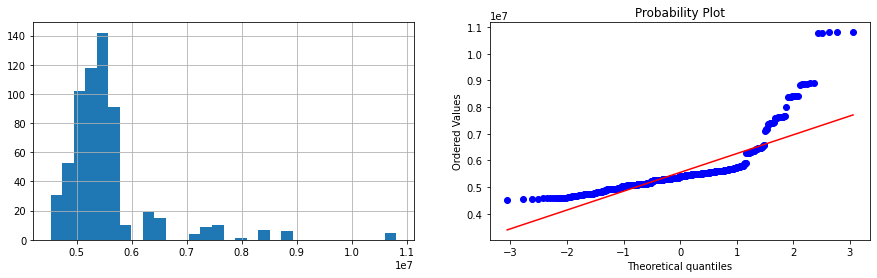

In [67]:
# Original Distribution 
diagnostic_plots_NUM(X_train2, 'milliseconds')

milliseconds_square


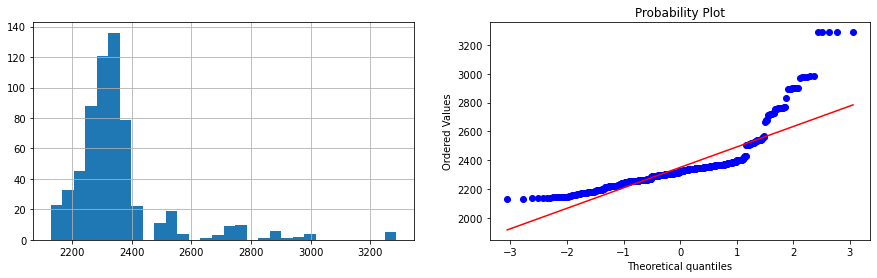

milliseconds_cube


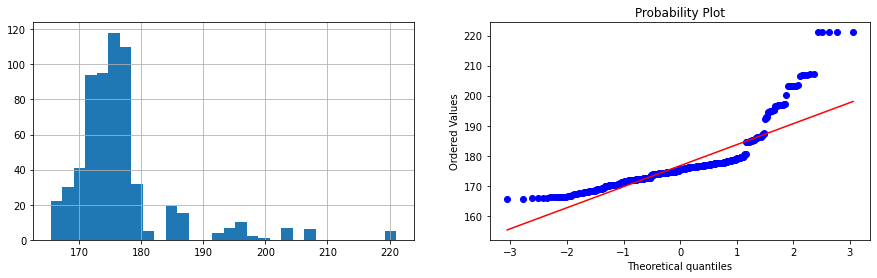

milliseconds_rec


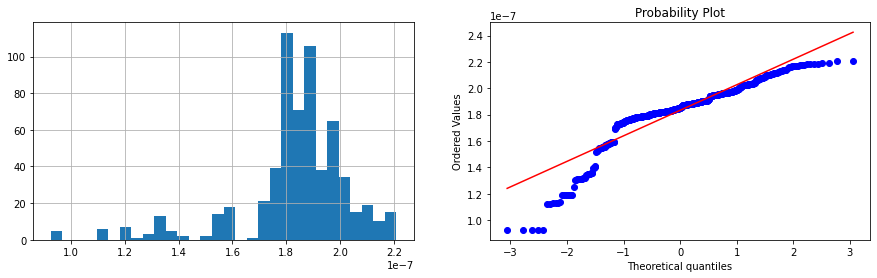

milliseconds_log


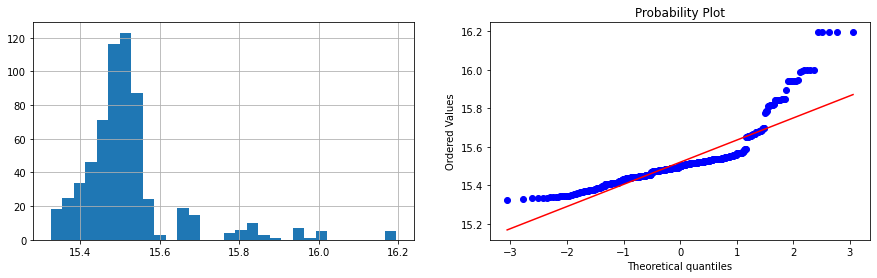

In [68]:
compare_transf(X_train2,'milliseconds')

### Number Transformation of fastestLapSpeed

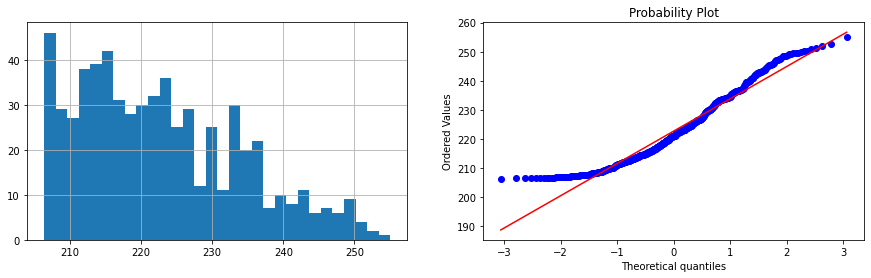

In [69]:
# Original Distribution 
diagnostic_plots_NUM(X_train2, 'fastestLapSpeed')

fastestLapSpeed_square


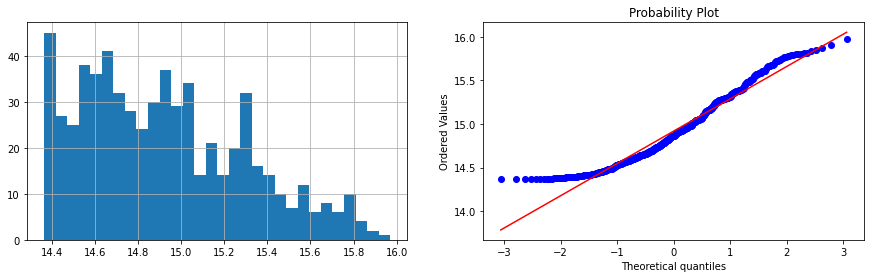

fastestLapSpeed_cube


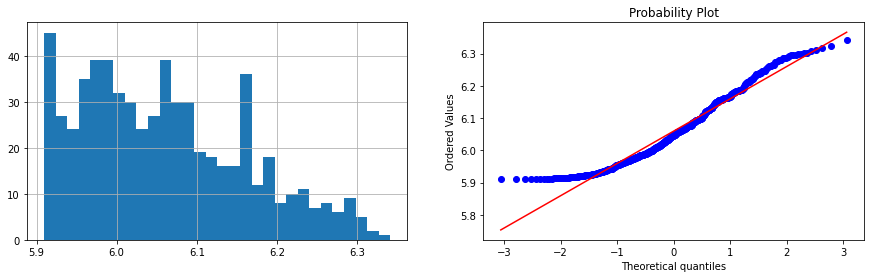

fastestLapSpeed_rec


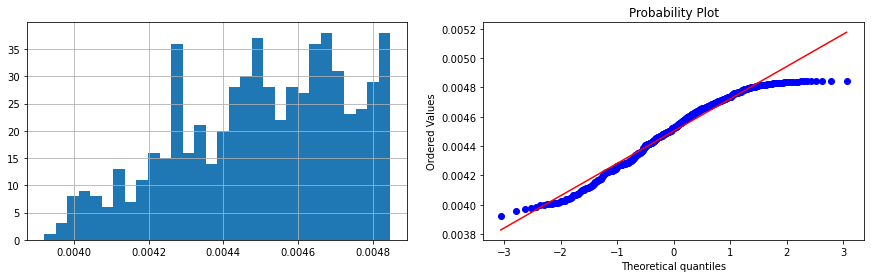

fastestLapSpeed_log


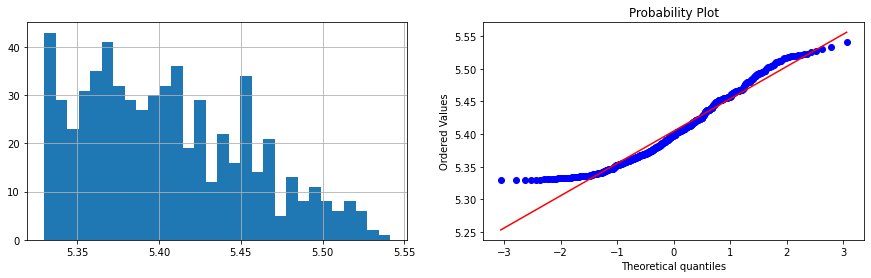

In [70]:
compare_transf(X_train2,'fastestLapSpeed')

Based on these comparisons, I have concluded that reciprocal transformation is the best for "milliseconds" and cube transformation is best for "fastestLapSpeed". 

Now, let's apply the transformation methods to X_train and X_test. 

In [71]:
# initialize the transformer
rt = ReciprocalTransformer(variables = ['milliseconds'])

# fit transformer to data
rt.fit(X_train)

# transform X_train and X_test
X_train = rt.transform(X_train)
X_test = rt.transform(X_test)

In [72]:
# initialize the transformer
Transformer = PowerTransformer(variables = ['fastestLapSpeed'], exp=1/3)

# fit transformer to data 
Transformer.fit(X_train)

# transform X_train and X_test
X_train = Transformer.transform(X_train)
X_test = Transformer.transform(X_test)

## 5.6 Categorical Data Enconding

In [73]:
mean_enc = MeanEncoder(variables=['circuit_name', 'company', 'status'])

mean_enc.fit(X_train, y_train)

X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

The model result is slightly better when using Target Mean Encoding. Therefore, I chose the MeanEncoder for my categorical variables.  

## 5.7 Variable Discretization/Binning

In [74]:
disc = EqualFrequencyDiscretiser(q=10, variables = ['milliseconds', 'fastestLapSpeed'])

disc.fit(X_train)

X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

Some of the models performed better with Equal Width Discretization. In my report below, I will share the reason why I chose Equal Frequency Discretiser over Equal Width Discretiser

## 5.8 Scaling 

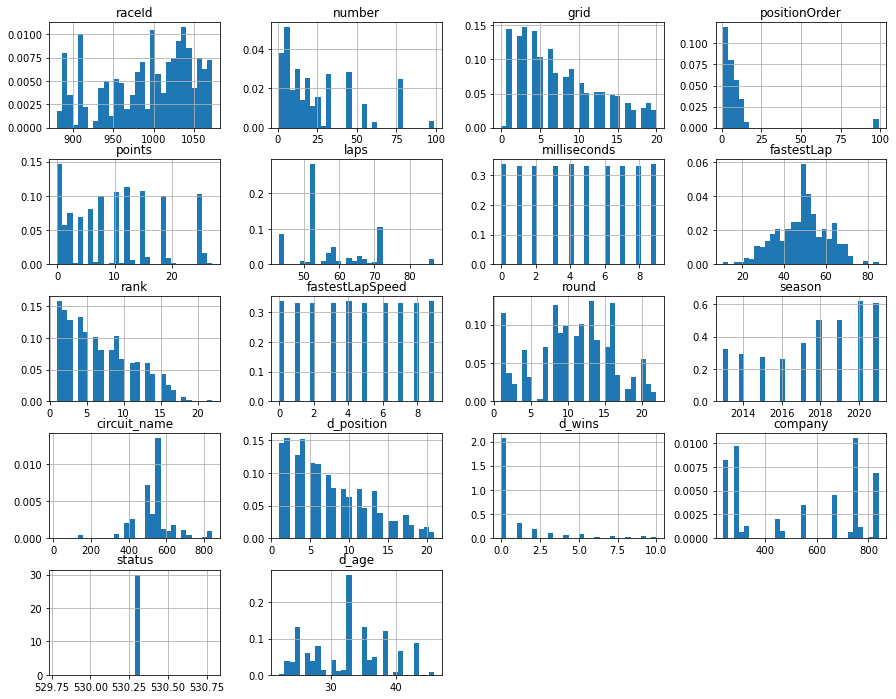

In [75]:
X_train.hist(bins=30, figsize=(15,12), density=True)
plt.show()

In [76]:
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# let's transform the returned NumPy arrays to dataframes
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

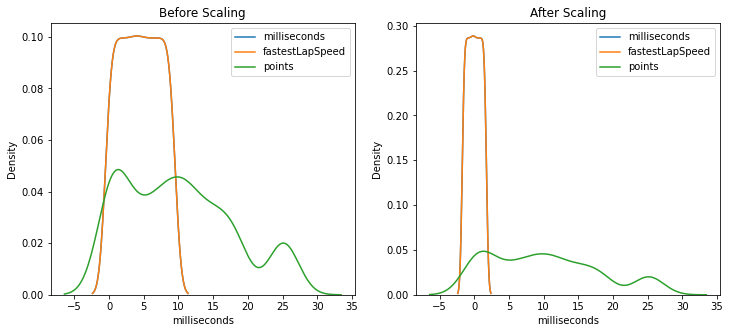

In [77]:
# let's compare the variable distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['milliseconds'], ax=ax1, label ='milliseconds')
sns.kdeplot(X_train['fastestLapSpeed'], ax=ax1, label ='fastestLapSpeed')
sns.kdeplot(X_train['points'], ax=ax1, label ='points')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled_df['milliseconds'], ax=ax2, label ='milliseconds')
sns.kdeplot(X_train_scaled_df['fastestLapSpeed'], ax=ax2, label ='fastestLapSpeed')
sns.kdeplot(X_train['points'], ax=ax2, label ='points')
ax2.legend()
plt.show()

# Machine Learning Modelling

In [78]:
print(X_train_scaled_df.shape)

(623, 18)


## Naive Baseline Model 

In [79]:
map = final_df[['driver_name', 'driverId']].drop_duplicates().sort_values(by=['driverId'])
y_labels = map['driver_name'].to_numpy()

In [80]:
# pick the modal class from train data
print(stats.mode(y_train))

modal_class_label = stats.mode(y_train)[0]


print(f"The modal class label is driverId {int(modal_class_label)}, \
and the accompanying driver name of this label is {y_labels[modal_class_label-1]}.")

ModeResult(mode=array([1], dtype=int64), count=array([60]))
The modal class label is driverId 1, and the accompanying driver name of this label is ['Lewis Hamilton'].


In [81]:
y_train_preds_naive = [int(modal_class_label) for row in X_train_scaled_df.iloc[:,0]]
y_train_preds_naive[0:5]

[1, 1, 1, 1, 1]

In [82]:
y_test_preds_naive = [int(modal_class_label) for row in X_test_scaled_df.iloc[:,0]]
y_test_preds_naive[0:5]

[1, 1, 1, 1, 1]

In [83]:
# scoring accuracy of model
# note that other metrics exist, eg. AUC-ROC, Confusion Matrix-Based Metrics, but these matter more for imbalanced data
# where classes don't share same representation, eg. class 0 is 80%, class 1 is 10%, class 2 is 10%
# and are advanced Machine Learning topics

from sklearn.metrics import accuracy_score

# train accuracy score
y_true = y_train
y_pred = y_train_preds_naive

train_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_naive

test_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:.2f}%.")

The Naive Baseline Model's accuracy on train data is 9.63%.
The Naive Baseline Model's accuracy on test data is 12.73%.


## Other Machine Learning Models

In [84]:
# classification ML algorithms 

lr = LogisticRegression(solver='sag')
dt = DecisionTreeClassifier()
rn = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GaussianNB()
sgd = SGDClassifier()

In [85]:
li = [lr,sgd,knn,gb,rn,dt]
d = {}
for i in li:
    i.fit(X_train_scaled_df,y_train)
    ypred = i.predict(X_test_scaled_df)
    print(i,":",accuracy_score(ypred,y_test)*100)
    d.update({str(i):i.score(X_test_scaled_df,y_test)*100})

LogisticRegression(solver='sag') : 70.0374531835206
SGDClassifier() : 63.670411985018724
KNeighborsClassifier() : 43.445692883895134
GaussianNB() : 92.50936329588015
RandomForestClassifier() : 95.50561797752809
DecisionTreeClassifier() : 98.12734082397003


# Report <a id="part9"></a>

## Table of Contents 

##### 1. [Introduction with Value Based Problem Statement](#part1)

##### 2. [Problem Formulation](#part2)
   - [2.1 Explore the Data](#part2.1)
   - [2.2 Understand the Data](#part2.2)
   - [2.3 Formulate a Prediction Problem](#part2.3)

##### 3. [Data Wrangling on multiple tables](#part3)
   - [3.1 Concatenate, Merge or Join the tables](#part3.1)
   - [3.2 Create new features, Data Filtration](#part3.2)

##### 4. [Data Cleansing and Transformation](#part4)
   - [4.1 Outliers](#part4.1)
   - [4.2 Missing Value Imputation](#part4.2)
   - [4.3 Numerical Transformation](#part4.3)
   - [4.4 Categorical Data Encoding](#part4.4)
   - [4.5 Binning/Discretization](#part4.5)
   - [4.6 scaling](#part4.6)

##### 5. [Machine Learning Modelling](#part5)
- [5.1 Description of Final Data Set](#part5.1)
- [5.2 Naive Baseline Model](#part5.2)
- [5.3 Other Machine Learning Models](#part5.3)

##### 6. [Summary and Further Improvements](#part6)

# 1 Introduction with Value Based Problem Statement<a id="part1"></a>

Formula One, also called F1 in short, is an international auto racing sport. F1 is the highest level of single-seat, open-wheel and open-cockpit professional motor racing contests. The objective of a Formula 1 contest is to determine the winner of a race. The driver who crosses the finish line first after completing a predetermined number of laps is declared the winner.

It would be extremely meaningful if my machine learning model can predict the results of Formula 1 (or help in the prediction of the winners). 

This project will be split into three parts:

- Data wrangling on multiple tables
- Data cleansing and Transformation
- Machine Learning Modelling

# 2 Problem Formulation<a id="part2"></a>

### 2.1 Data Exploration<a id="part2.1"></a>

#### Location of Grand Prix since 1950

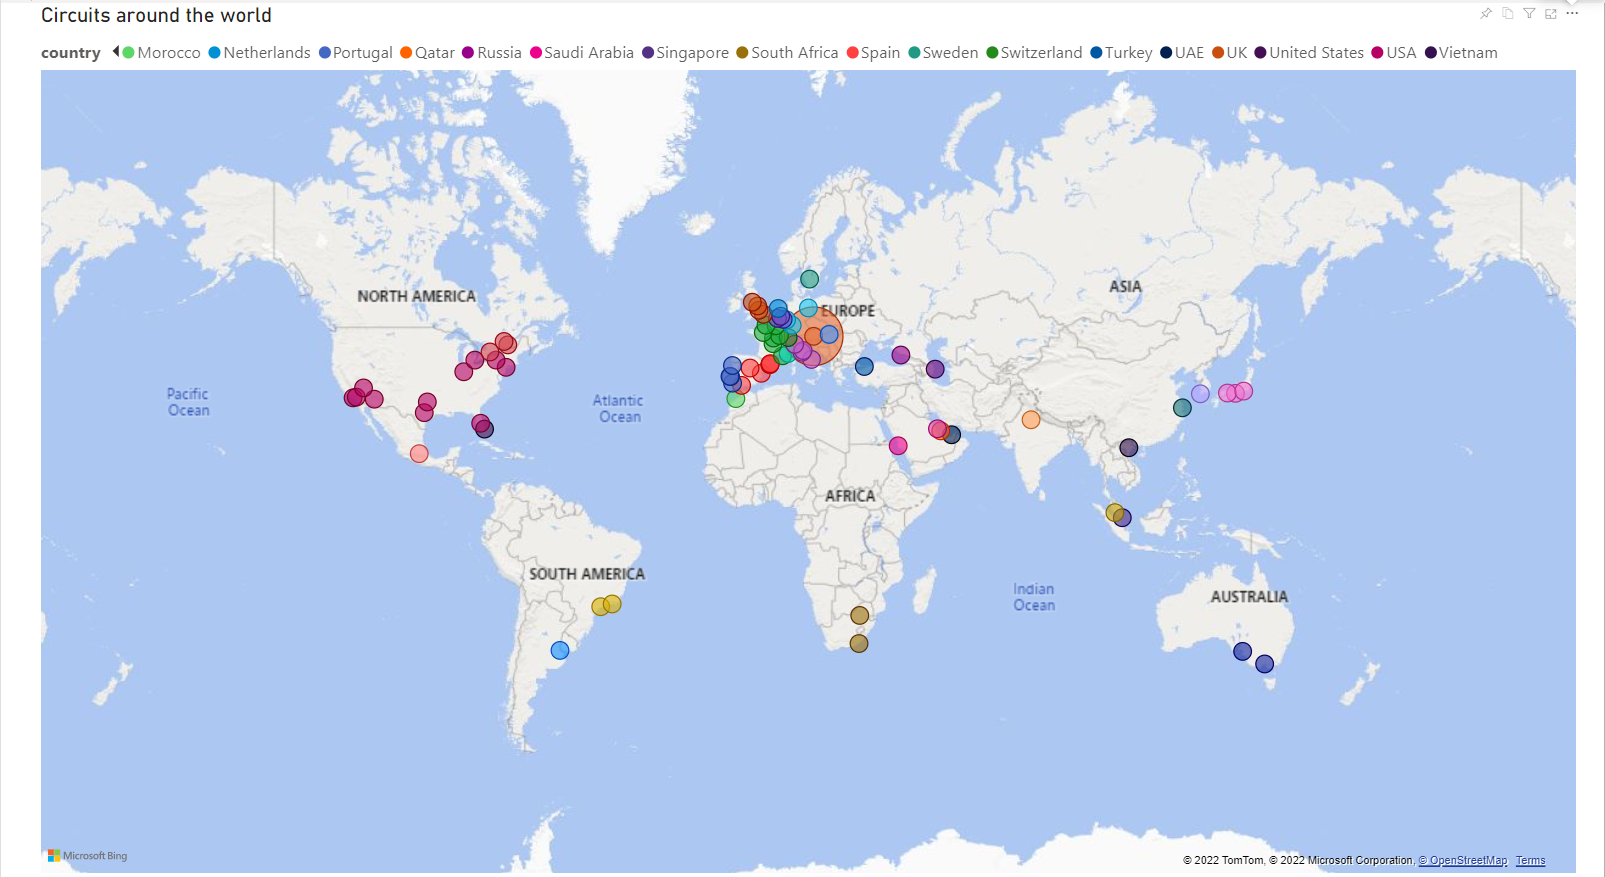

The map shows the locations of all the Grand Prix held since the inaugural season. Most of the circuits are in Europe. There are 79 circuits in total so far. 

#### Most Popular Circuits

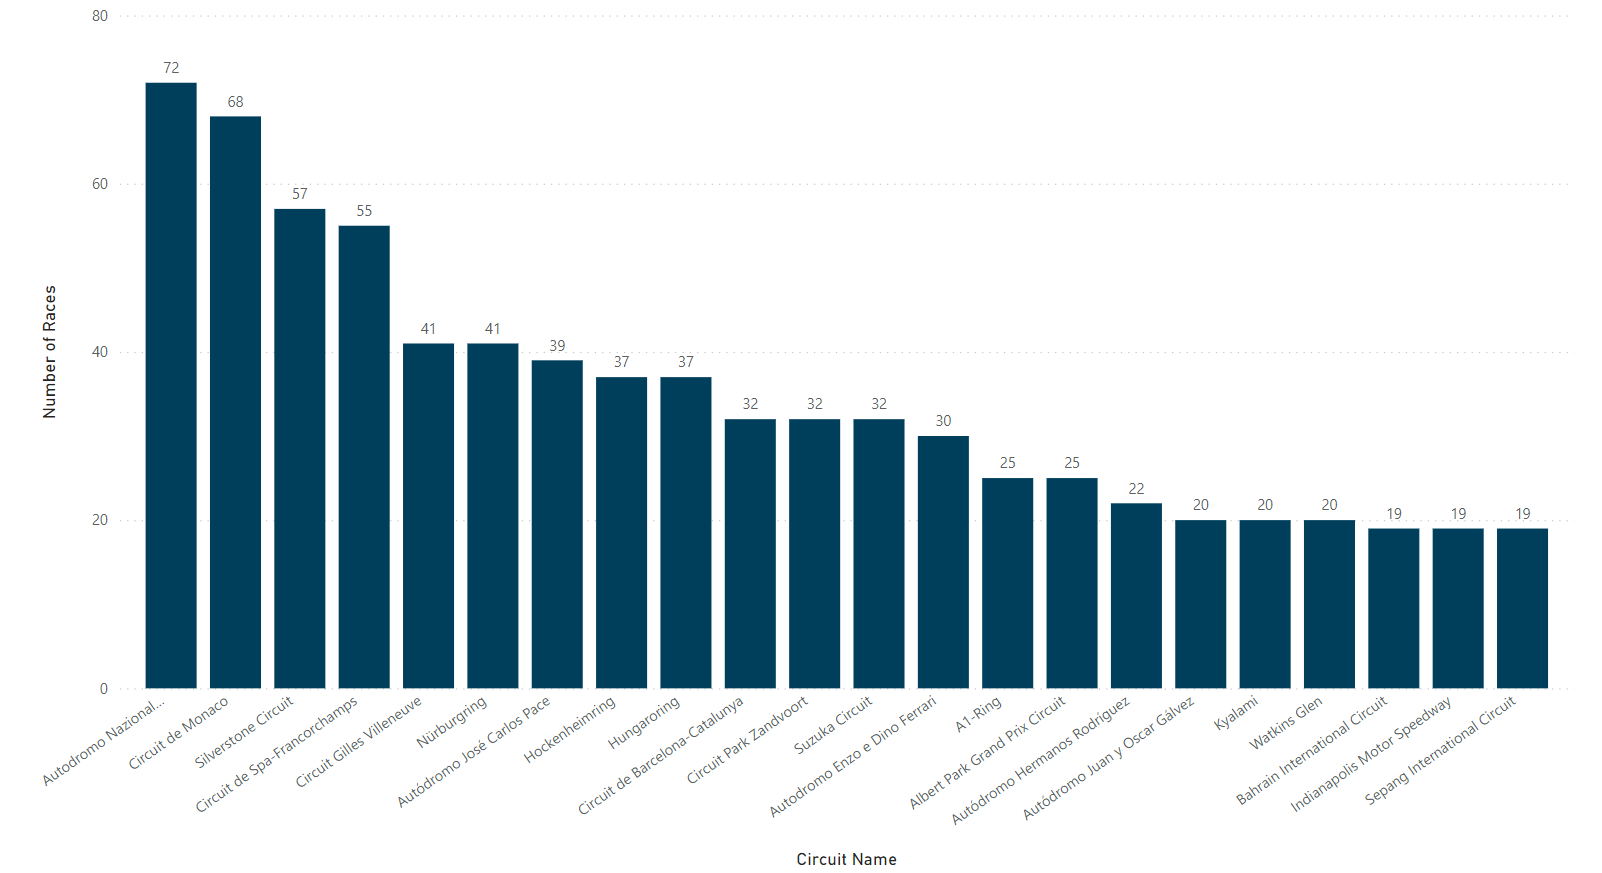

This chart shows the number of races that have occured in that circuit. The first drivers’ world championship was held in 1950 at the British Grand Prix at Silverstone and comprised only seven races. The number of Grand Prix per season varied over the years, averaging 19 races in the latest seasons. The location of the races has also varied over time, depending on the suitability of the track and other financial reasons.

#### Most Dangerous Circuits

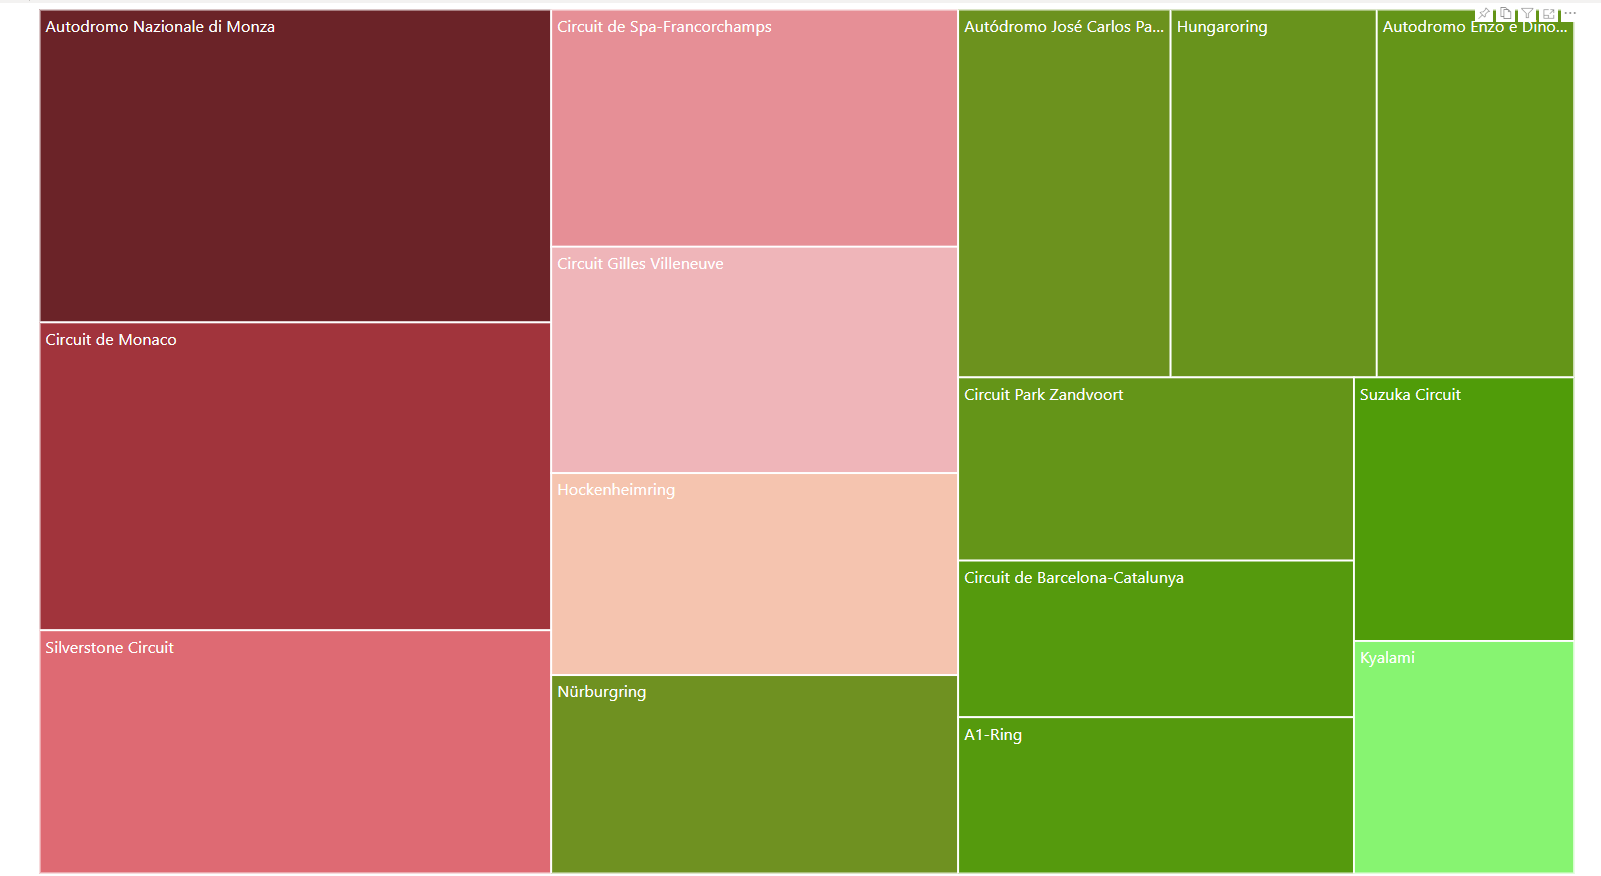

Some of the circuit layouts have been redesigned over the years to meet stricter safety requirements. Currently, most of the circuits are specifically constructed for competitions, in order to avoid long and fast straights or dangerous turns. However, some races are still held at street circuits, such as the Monaco Grand Prix, which is still in use mainly for its fame and history, despite not conforming with the latest strict measures. The following tree-map shows some of the most popular tracks by number of incidents or collisions.

#### Teams with more car failures

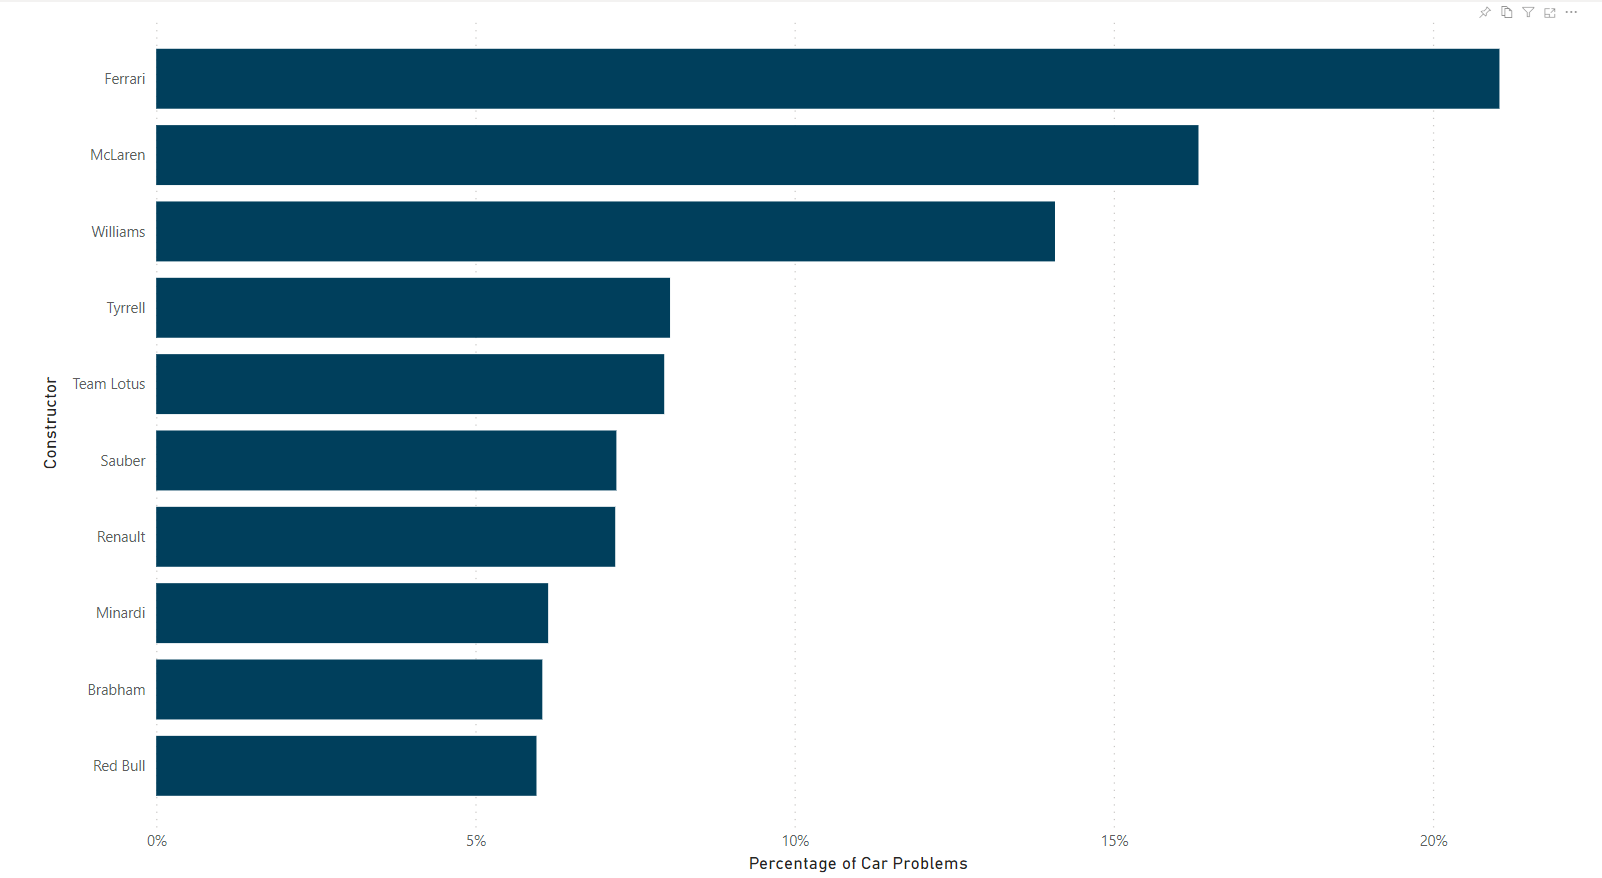

The bar chart shows which teams experienced the highest number of car problems over the years, including engine failures, brakes, suspension or transmission problems.

### 2.2 Understand the data

Given the data files, there are 13 tables in total. 

1. circuits 

This table shows the information of all the circuits where F1 races are held. 

2. constructor_results

This table shows the race results of the constructor's championship. 

3. constructor_standings

This table shows the final standings of the constructor's championship.

4. constructors

This table shows the different constructors in F1. There are a total of 211 constructors in the history of F1. 

5. driver_standings

This table shows the final standings of the driver's championship.

6. drivers

This table shows the information of drivers in F1. It includes their names. date of birth, and nationality. 

7. lap_times

This table shows the Lap times in F1. 

8. pit_stops

This table shows the pit stops in F1.

9. qualifying

This table shows the qualifying details in F1.

10. races

This table shows all the races in F1. 

11. results

This table shows the results of F1 races.

12. seasons

This table shows the seasons of F1.

13. status

This table shows the mapping of various statuses. 

### 2.3 Formulate a Prediction Problem

As per mentioned, the objective of a Formula 1 contest is to determine the winner of a race. I want to formulate a prediction problem related to the objective so that the value of the problem is high. Therefore, I would like to try and predict the driver who will win the race or in other words, the champion of the driver standing.

# 3 Data Wrangling on multiple tables<a id="part3"></a>

After looking at all the data, I picked seven tables to form my dataframe which I have to merge together using common keys. My final dataframe includes information of races, results, circuits, driver, driver_standings, constructors and status. 

### 3.1 Merging Tables <a id="part3.1"></a>

#### Tables that I picked to merge

1. races
2. results
3. circuits
4. driver
5. driver_standings
6. constructors
7. status

#### Steps taken

- Merge results with races based on 'raceId'
- Merge with circuits based on 'circuitsId' : obtain the circuit name 
- Merge with drivers based on 'driverId' : obtain the driver's name and date of birth
- Merge with driver_standings based on ['raceId','driverId'] : obtain driver's position and win
- Merge with constructors based on 'constructorId' : obtain the constructor name (company)
- Merge with status based on 'statusId' : obtain the status of the race

When merging, some columns are duplicated therefore I dropped the columns that were unnecessary while I was merging that data. I also renamed the columns along the way as columns with the same name like 'name' for e.g. will be replaced by 'name_x' and 'name_y' by python, which defeats the purpose of the column names as it does not give us the clear idea of what the column is about. 

#### 3.2 Create new features, Data Filtration <a id="part3.2"></a>

##### Date Column
Some of the dates given in the data is not a valid date. For instance, there are entries like '4/5/12009' and '6/7/12009'. 

I decided that instead of keeping the date column, I only want the year value as it represents seasons. To do so, I have to split 'date' column into multiple columns(day, month and year) by '/'. Subsequently, for values that are more than 4 digits in the year column, I will strip the first character/number it has. Referring back to the example, 12009 will become 2009. 

Finally, after having my desired year column, I dropped the columns that were no longer needed. The columns are 'date', 'day' and 'month'. 

##### Age of Driver
To obtain the age of the drivers, I had to convert 'dob' column to datetime datatype. By rounding the value of (todays' date subtract the dob and divide by 365), I was able to get the age of the driver. After creating a new column, specifically for the drivers' age, I proceeded to drop the column of 'dob'.

##### Changing of Data Types
Some of the data type of the columns are not what we want. For instance, 'milliseconds' is an object even though we want it to be a numerical variable. Therefore, I explicitly cast these variables ['number','milliseconds','fastestLap','rank','fastestLapSpeed'] to numeric. 

##### Stratification

- Drivers and Constructors

Some of the drivers or constructors were only present for very few races. Consequently, if they were kept, when dividing the data into train and test, there are some records of such drivers or constructors that cannot be found in a certain dataset. Those drivers or constructors were removed if there were less than 6 and 10 respectively.

- Status

I consider the races without the 'Finished' status as not useful therefore I dropped the rows with status other than 'Finished'. This would allow us to focus on races that were successfully complete in hopes to predict the winner of the race. The chance of winning without the 'Finished' status is almost 0.

- Year

To predict the winner of the race, data from too long ago should be removed otherwise the model might predict a driver from the past. Therefore I am only keeping events that happened in the last 10 years. However, I was not able to do this if I did not do a missing value imputation for 'year'. Some of the dates of the races were not given in the dataset. Therefore, I sorted the data based on raceId and used a forward filling method to fill the null values in 'year'. 

- fastestLapSpeed

The winner of the race is usually the one with a faster lap speed therefore the fastestLapSpeed is a factor that I think is important to predict the winner of the race. I only kept the rows where the driver's fastestLapSpeed is more than the mean of all driver's fastestLapSpeed. This would make my dataset to have those drivers who are really top notch and have the chance of winning the championship.

# 4 Data Cleansing and Transformation <a id="part4"></a>

## 4.1 Outliers <a id="part4.1"></a>

Outliers are present in columns:
- number
- positionOrder
- laps
- milliseconds
- fastestLap
- rank
- d_wins

I decided to not handle the outliers present in these columns because I believe that the outliers makes sense and there are reasons as to why the value was produced. I did try different methods to handle the outliers but none of them gave me satisfied results. It even caused issues when I was building my model. Therefore I came to realise that it is not necessary to handle the outliers. 

Handling outliers may not always be good especially if you handled outliers inappropriately. Outliers can be important data especially when our data set is not that big. I saw this comment made by a user in [Quora](https://www.quora.com/Why-would-you-not-remove-outliers-from-a-data-set) and he said “But the real world is filled with outliers, so if you want to model the real world you can't delete the parts of it you think don't belong.” which makes a lot of sense therefore, in combine of all these reasons, I decided not to handle the outliers in this dataset.

## 4.2 Missing Value Imputation <a id="part4.2"></a>

Missing values are present in these columns:
- year (dealt with it previously)
- number
- rank
- fastestLap
- fastestLapSpeed
- milliseconds

### Simple Imputation -- number, rank and fastestLap
Used the .fillna(0) method to fill the null values in number, rank and fastestLap columns

### Mean Imputer -- fastestLapSpeed and milliseconds
Used the MeanMedianImputer to impute missing values with the mean value of that column. I used this method to impute the missing values in fastestLapSpeed and milliseconds columns.

## 4.3 Numerical Transformation <a id="part4.3"></a>

I only transformed two variables here. They are 'milliseconds' and 'fastestLapSpeed'.

I prepared the following methods to perform the numerical transformation:
- Square Root transformation
- Cube Root transformation
- Log Transformation
- Reciprocal Transformation

### milliseconds

After comparing the plots to the original distribution, I think that the reciprocal transformation is the best for milliseconds.

### fastestLapSpeed

After comparing the plots to the original distribution, I think that the cube root transformation is the best for milliseconds.

## 4.4 Categorical Data Encoding <a id="part4.4"></a>

I tried Ordinal Encoding and Target Mean Encoding. 

Model results with Ordinal Encoding:

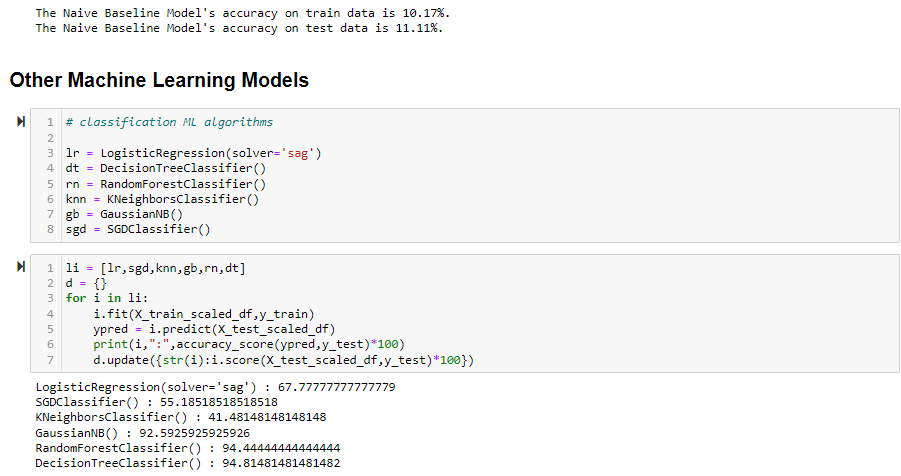

Model results with Target Mean Encoding:

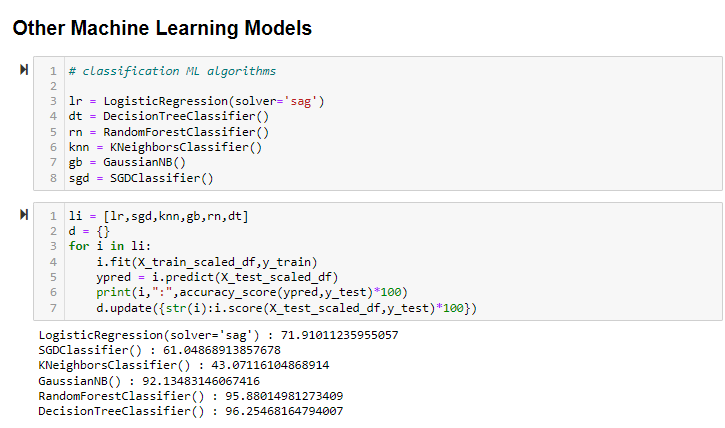

The model result is slightly better when using Target Mean Encoding. Therefore, I chose the MeanEncoder for my categorical variables.  

## 4.5 Binning/Discretization <a id="part4.5"></a>

I tried the Equal Frequency and Equal Width Discretization. 

Model results with Equal Frequency:

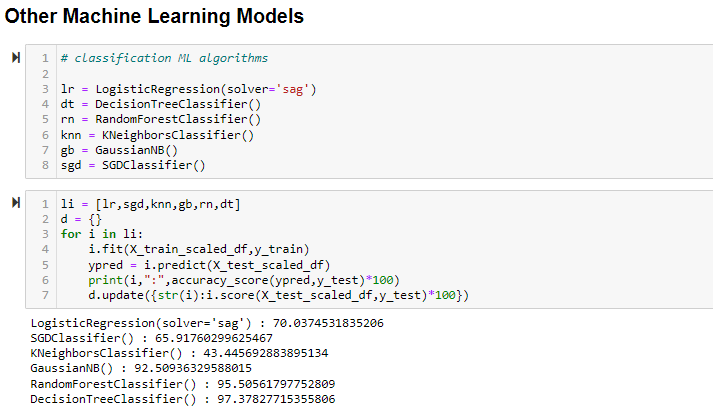


Model results with Equal Width:

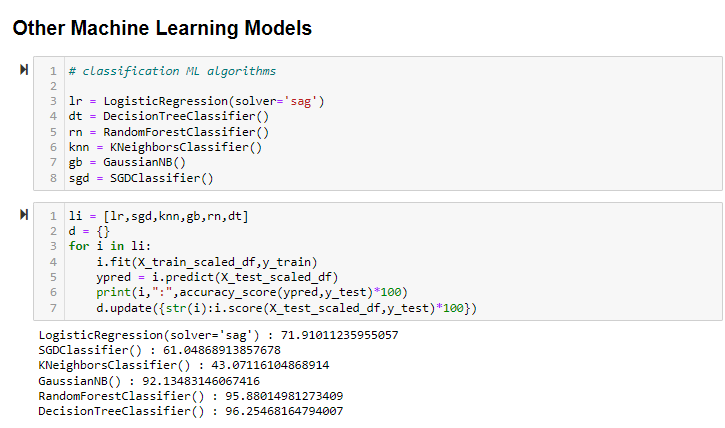

Some of the models performed better with Equal Width Discretization. The following compares the results of each model. 

When using Equal Width Discretization:
- LogisticRegression : +1.872659176
- SGDClasssifier : -4.868913858
- KNeighborsClassifier : +0.3745318352
- GaussianNB : +0.3745318352
- RandomForestClassifier : +0.3745318352
- DecisionTreeClassier : -1.123595506

Overall, Equal Width Discretization performed worse despite the slight improve in 4 model results as it decreases the accuracy of the two other models more. It is better to use the Equal Frequency Discretization as it generated the highest accuracy of the model we have so far which is at 97% for DecisionTreeClassifier. 

## 4.6 Scaling <a id="part4.6"></a>


Without Scaling:

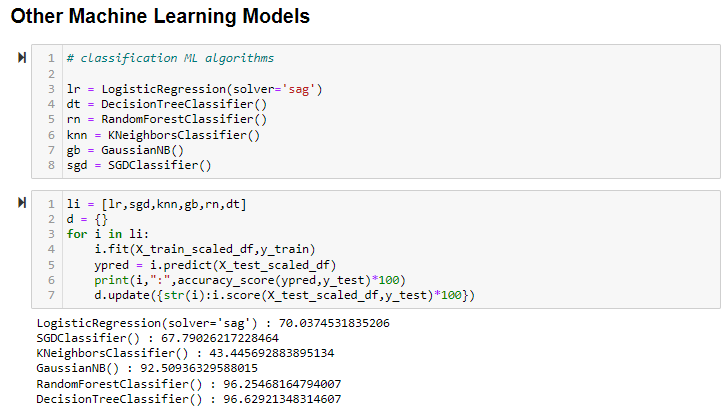


With Standard Scaling: 

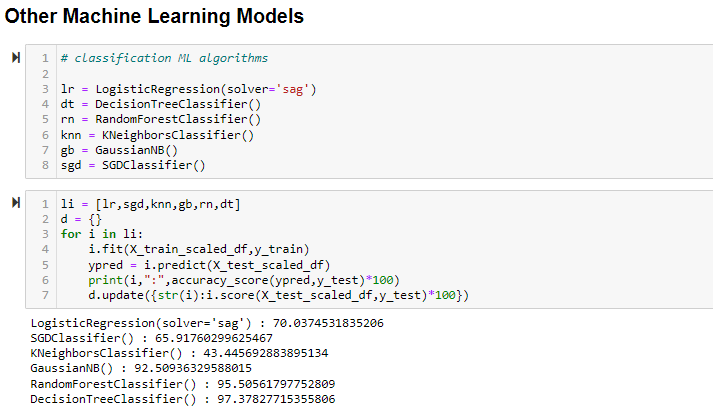

The difference in each model result after scaling with Standard Scaler was done: 
- LogisticRegression : -
- SGDClasssifier : -1.872659176
- KNeighborsClassifier : -
- GaussianNB : -
- RandomForestClassifier : -1.123595506
- DecisionTreeClassier : +1.123595506

Even though it seems like by scaling the data, our model accuracy deproves for two models. But I think we should still perform scaling as it is an important step that should not be missed and therefore I will do scaling regardless. Furthermore, by scaling, we can achieve a higher accuracy result of 97% for our Decision Tree Classifier model. 

With MinMax Scaling:

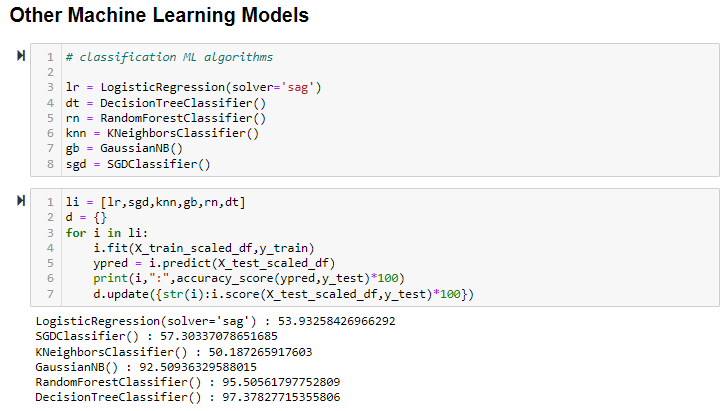

The model results deproved when using MinMaxScaler instead of StandardScaler. 

Out of curiosity, I tried scaling with Standard Scaler followed by MinMax Scaler.

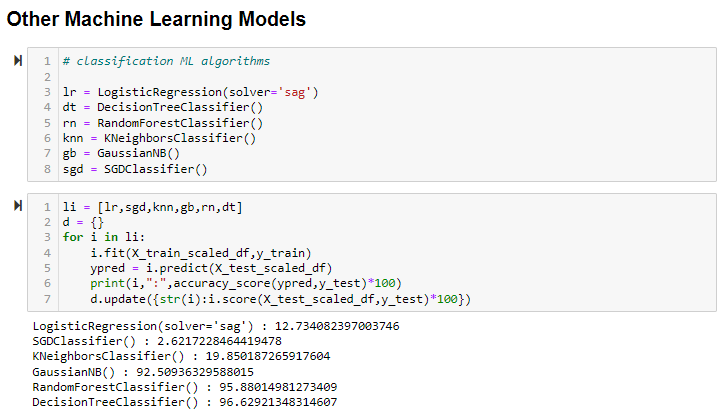

It is definitely not a good idea to do this as the model accuracy dropped drastically for LogisticRegression and SGDClasssifier. It dropped to as low as 2% for SDGClassifier.

All in all, I decided to use Standard Scaler for Scaling.

# 5 Machine Learning Modelling <a id="part5"></a>

## 5.1 Description of Final Data Set <a id="part5.1"></a>

Combination of steps used for my final X_train and X_test:
- Outliers

Did not handle outliers

- Missing data

Last Value Replacement, Simple Replace Value and Mean Imputer

The missing values imputations methods were chosen based on what suits the variable the most. The race Id is in the chronological order therefore if I sort it based on race Id, I will be able to tell when the race was conducted based on the other data using the last value replacement method. It makes sense to fill the columns 'number', 'rank' and 'fastestLap' as 0, because 0 can represent as empty in the context of those columns. Mean imputer was used to fill in the missing values in columns 'fastestLapSpeed' and 'milliseconds'. 

- Numerical Transformation: 

Cube Root and Reciprocal Transformation

For the Numerical Transformation, I chose Cube Root for 'fastestLapSpeed' and Reciprocal Transformation for 'milliseconds' based on the comparision of the graphs.

- Categorical Data Encoding:

Target Mean Encoding 

The model result is slightly better when using Target Mean Encoding. Therefore, I chose the MeanEncoder for my categorical variables.  

- Variable Discretization: 

EqualFrequency

Some of the models performed better with Equal Width Discretization. But overall, Equal Width Discretization performed worse despite the slight improve in 4 model results as it decreases the accuracy of the two other models more. It is better to use the Equal Frequency Discretization as it generated the highest accuracy of the model we have so far which is at 97% for DecisionTreeClassifier. 

- Scaling: 

Standard Scaler

Standard Scaler was used instead of Min Max Scaler as the model result is better when using Standard Scaler.

The final data set (X_train_scaled_df) consists of 18 columns and 623 rows. With 18 columns, I believe that my predictions are not trivial or unrealistic. 

## 5.2 Naive Baseline Model <a id="part5.2"></a>

The naive baseline model predicted Lewis Hamilton as the champion.

The model has an accuracy of 9.63% for train data and 12.73% for test data. 

## 5.3 Other Machine Learning Models <a id="part5.3"></a>

I have included six other machine learning model to evaluate the results. They are namely:
- LogisticRegression 
- SGDClasssifier 
- KNeighborsClassifier 
- GaussianNB 
- RandomForestClassifier 
- DecisionTreeClassier 

Model Results:

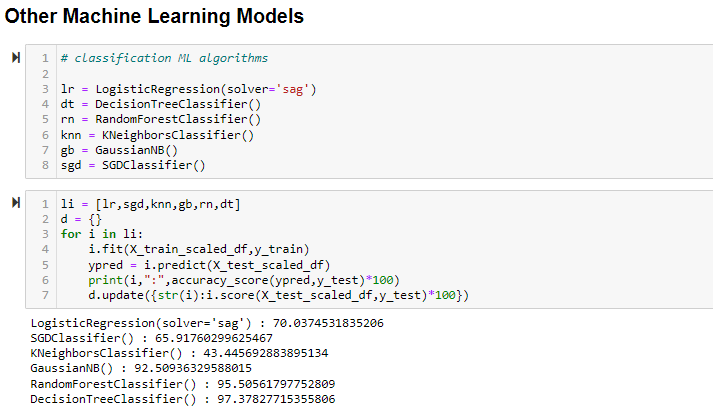

The best performing model is the Decision Tree Classifier Model with an accuracy of 97.38%.

Model improved drastically compared to naive baseline model.


# 6 Summary and Further Improvements <a id="part6"></a>

In conclusion, even though the dataset given was robust, not everything can be used to predict my problem. My model results will differ if an additional column/row was included. It is quite hard to experiment with different data frames within a short time frame and therefore I picked the columns based on my understanding of the data which may or may not be wrong as I am a novice to Formula 1. 

I have also experimented on different data processing methods to inorder to get my ‘best’ model result. There are many methods in the world that we can use to handle outliers, impute missing data or transform our data but the method chosen must suit our variables. In order to find the most suitable method, we need to understand our data well, despite spending alot of time understanding the data, I am not fully confident that I understand the data well.

However, I have selected the methods based on my basic understanding of what each method does and how they suit my data so I was not able to experiment on ALL the methods that were taught. For instance, I did not use the Box-Cox method for numerical transformation and did not try out discretizing a variable into predefined intervals for Discretization. So I will not know if these methods help in my model. So an improvement that can be is to try out other methods because I might be able to achieve better model results if I tested these methods with my model: 

#### Numerical Transformation
Box-Cox transformation, Yeo-Johnson transformation
#### Categorical Encoding
One-Hot encoding, Replace with counts of frequency
#### Variable Discretization/Binning
Arbitrary Interval Discretization
#### Scaling
Mean Normalization, Maximum Absolute Scaling, Robust Scaling 

We will never know if these methods might unexpectedly have an outstanding effect on the model until we actually test them out.